                                    Davor Ljubenkov 2019. Master Thesis MIT SCL - KTH

                                                https://dljubenk.github.io/blog/

# ---------------------------------------------------------------------------------------------------------------

    #STATIONS (2016) = 161             #BIKES (2016) = 1451              #RIDES (2016)

    #STATIONS (2017) = 186             #BIKES (2017) = 1691              #RIDES (2017) = 1'313'744 (not 5.3 MILLION)

    #STATIONS (2018) = 194             #BIKES (2018) = 2098              #RIDES (2018) = 

    #STATIONS (2019) = 231             #BIKES (2019) = 2287              #RIDES (2019) = 

# ---------------------------------------------------------------------------------------------------------------

In [25]:
import os
import pandas as pd

import geopandas as gpd
from geopandas.tools import sjoin


import rtree

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import seaborn as sns

import folium
from folium.plugins import MarkerCluster

import shapely
from shapely.geometry import Point

import unicodedata

import pysal
from pysal.esda import mapclassify

import datetime as dt

import numpy as np
from numpy import array
from numpy import hstack

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelBinarizer
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

# We'll be using the Tensorflow backend (default).
import tensorflow as tf

#import theano.tensor as T

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


import keras
from keras import backend as K    #RNN LSTM NOT WORK WITHOUT THIS
from keras.models import load_model
from keras.models import model_from_json
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D, Dropout, Activation, Flatten, Dense
from keras.optimizers import Adam

import logging

import jgraph

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler


import math
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import LSTM
from keras.layers.recurrent import LSTM
from keras.layers import RNN, SimpleRNN
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers.core import Activation
from keras.callbacks import LambdaCallback

from __future__ import print_function

import random

# weather data "weather"

"weather" includes 2016, 2017, and first 3 months of 2018

In [26]:
weather = pd.read_csv("./weather.csv")
del weather['High Sea Level Press (in)']
del weather['Avg Sea Level Press (in)']
del weather['Low Sea Level Press (in)']
del weather['Avg Temp (F)']
del weather['Avg Dew Point (F)']
del weather['Avg Humidity (%)']
del weather['Avg Visibility (mi)']

weather2018 = weather[weather.Year == 2018]
weather2018 = weather2018[weather2018.Month != 4]
weather2018 = weather2018.reset_index(drop=True)
weather2018.head(weather2018.shape[0])

df = pd.DataFrame(weather2018)

line = pd.DataFrame({ "Year": 2018, "Month": 3, "Day": 21, "High Temp (F)": 39, "Low Temp (F)": 32, "High Dew Point (F)": 28, "Low Dew Point (F)": 22, "High Humidity (%)": 78, "Low Humidity (%)": 61, "High Visibility (mi)": 10, "Low Visibility (mi)": 10, "High Wind (mph)": 25, "Avg Wind (mph)": 8, "High Wind Gust (mph)": 28, "Snowfall (in)": 0.00, "Precip (in)": 0.00, "Events": None}, index=[78])
df2 = pd.concat([df.ix[:78], line, df.ix[79:]]).reset_index(drop=True)

weather2018 = df2

df = pd.DataFrame(weather2018)

line = pd.DataFrame({ "Year": 2018, "Month": 3, "Day": 22, "High Temp (F)": 42, "Low Temp (F)": 32, "High Dew Point (F)": 35, "Low Dew Point (F)": 34, "High Humidity (%)": 96, "Low Humidity (%)": 73, "High Visibility (mi)": 10, "Low Visibility (mi)": 1, "High Wind (mph)": 30, "Avg Wind (mph)": 5, "High Wind Gust (mph)": 32, "Snowfall (in)": 0.09, "Precip (in)": 0.09, "Events": 'Both'}, index=[79])
df2 = pd.concat([df.ix[:79], line, df.ix[80:]]).reset_index(drop=True)

weather2018 = df2

weather2017 = weather[weather.Year == 2017]
weather2017 = weather2017.reset_index(drop=True)

weather2016 = weather[weather.Year == 2016]
weather2016 = weather2016.reset_index(drop=True)

weather1617 = weather2016.append(weather2017)
weather1617 = weather1617.reset_index(drop=True)
weather161718 = weather1617.append(weather2018)
weather161718 = weather161718.reset_index(drop=True)


#weather161718.head(weather161718.shape[0])

weather = weather161718

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


# bike data "bikes"

DESCRIPTION OF THINGS CLEANED:

removing long trips

we lost 1481 trips (1767759 - 1766278) in 2018. that were longer than 24 hours (86400 seconds)
for example, one trip was even 53 days long, investigate maybe this super long trips?

# 2016

In [27]:
dataset201601 = pd.read_csv("./2016/201601.csv")
dataset201601 = dataset201601[dataset201601['tripduration'] < 86400]
dataset201601 = dataset201601[['starttime','stoptime']]
dataset201601['starttime'] = dataset201601['starttime'].str[:10]
dataset201601['stoptime'] = dataset201601['stoptime'].str[:10]
dataset201601['freq'] = dataset201601.groupby('starttime')['starttime'].transform('count')
dataset201601 = dataset201601.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201601 = dataset201601.reset_index(drop=True)
del dataset201601['stoptime']
#dataset201601.insert( 0,'index', 1)

dataset201602 = pd.read_csv("./2016/201602.csv")
dataset201602 = dataset201602[dataset201602['tripduration'] < 86400]
dataset201602 = dataset201602[['starttime','stoptime']]
dataset201602['starttime'] = dataset201602['starttime'].str[:10]
dataset201602['stoptime'] = dataset201602['stoptime'].str[:10]
dataset201602['freq'] = dataset201602.groupby('starttime')['starttime'].transform('count')
dataset201602 = dataset201602.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201602 = dataset201602.reset_index(drop=True)
del dataset201602['stoptime']
#dataset201602.insert( 0,'index', 1)

dataset201603 = pd.read_csv("./2016/201603.csv")
dataset201603 = dataset201603[dataset201603['tripduration'] < 86400]
dataset201603 = dataset201603[['starttime','stoptime']]
dataset201603['starttime'] = dataset201603['starttime'].str[:10]
dataset201603['stoptime'] = dataset201603['stoptime'].str[:10]
dataset201603['freq'] = dataset201603.groupby('starttime')['starttime'].transform('count')
dataset201603 = dataset201603.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201603 = dataset201603.reset_index(drop=True)
del dataset201603['stoptime']
#dataset201603.insert( 0,'index', 1)

dataset201604 = pd.read_csv("./2016/201604.csv")
dataset201604 = dataset201604[dataset201604['tripduration'] < 86400]
dataset201604 = dataset201604[['starttime','stoptime']]
dataset201604['starttime'] = dataset201604['starttime'].str[:10]
dataset201604['stoptime'] = dataset201604['stoptime'].str[:10]
dataset201604['freq'] = dataset201604.groupby('starttime')['starttime'].transform('count')
dataset201604 = dataset201604.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201604 = dataset201604.reset_index(drop=True)
del dataset201604['stoptime']
#dataset201604.insert( 0,'index', 1)

dataset201605 = pd.read_csv("./2016/201605.csv")
dataset201605 = dataset201605[dataset201605['tripduration'] < 86400]
dataset201605 = dataset201605[['starttime','stoptime']]
dataset201605['starttime'] = dataset201605['starttime'].str[:10]
dataset201605['stoptime'] = dataset201605['stoptime'].str[:10]
dataset201605['freq'] = dataset201605.groupby('starttime')['starttime'].transform('count')
dataset201605 = dataset201605.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201605 = dataset201605.reset_index(drop=True)
del dataset201605['stoptime']
#dataset201605.insert( 0,'index', 1)

dataset201606 = pd.read_csv("./2016/201606.csv")
dataset201606 = dataset201606[dataset201606['tripduration'] < 86400]
dataset201606 = dataset201606[['starttime','stoptime']]
dataset201606['starttime'] = dataset201606['starttime'].str[:10]
dataset201606['stoptime'] = dataset201606['stoptime'].str[:10]
dataset201606['freq'] = dataset201606.groupby('starttime')['starttime'].transform('count')
dataset201606 = dataset201606.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201606 = dataset201606.reset_index(drop=True)
del dataset201606['stoptime']
#dataset201606.insert( 0,'index', 1)

dataset201607 = pd.read_csv("./2016/201607.csv")
dataset201607 = dataset201607[dataset201607['tripduration'] < 86400]
dataset201607 = dataset201607[['starttime','stoptime']]
dataset201607['starttime'] = dataset201607['starttime'].str[:10]
dataset201607['stoptime'] = dataset201607['stoptime'].str[:10]
dataset201607['freq'] = dataset201607.groupby('starttime')['starttime'].transform('count')
dataset201607 = dataset201607.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201607 = dataset201607.reset_index(drop=True)
del dataset201607['stoptime']
#dataset201607.insert( 0,'index', 1)

dataset201608 = pd.read_csv("./2016/201608.csv")
dataset201608 = dataset201608[dataset201608['tripduration'] < 86400]
dataset201608 = dataset201608[['starttime','stoptime']]
dataset201608['starttime'] = dataset201608['starttime'].str[:10]
dataset201608['stoptime'] = dataset201608['stoptime'].str[:10]
dataset201608['freq'] = dataset201608.groupby('starttime')['starttime'].transform('count')
dataset201608 = dataset201608.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201608 = dataset201608.reset_index(drop=True)
del dataset201608['stoptime']
#dataset201608.insert( 0,'index', 1)

dataset201609 = pd.read_csv("./2016/201609.csv")
dataset201609 = dataset201609[dataset201609['tripduration'] < 86400]
dataset201609 = dataset201609[['starttime','stoptime']]
dataset201609['starttime'] = dataset201609['starttime'].str[:10]
dataset201609['stoptime'] = dataset201609['stoptime'].str[:10]
dataset201609['freq'] = dataset201609.groupby('starttime')['starttime'].transform('count')
dataset201609 = dataset201609.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201609 = dataset201609.reset_index(drop=True)
del dataset201609['stoptime']
#dataset201609.insert( 0,'index', 1)

dataset201610 = pd.read_csv("./2016/201610.csv")
dataset201610 = dataset201610[dataset201610['tripduration'] < 86400]
dataset201610 = dataset201610[['starttime','stoptime']]
dataset201610['starttime'] = dataset201610['starttime'].str[:10]
dataset201610['stoptime'] = dataset201610['stoptime'].str[:10]
dataset201610['freq'] = dataset201610.groupby('starttime')['starttime'].transform('count')
dataset201610 = dataset201610.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201610 = dataset201610.reset_index(drop=True)
del dataset201610['stoptime']
#dataset201610.insert( 0,'index', 1)

dataset201611 = pd.read_csv("./2016/201611.csv")
dataset201611 = dataset201611[dataset201611['tripduration'] < 86400]
dataset201611 = dataset201611[['starttime','stoptime']]
dataset201611['starttime'] = dataset201611['starttime'].str[:10]
dataset201611['stoptime'] = dataset201611['stoptime'].str[:10]
dataset201611['freq'] = dataset201611.groupby('starttime')['starttime'].transform('count')
dataset201611 = dataset201611.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201611 = dataset201611.reset_index(drop=True)
del dataset201611['stoptime']
#dataset201611.insert( 0,'index', 1)

dataset201612 = pd.read_csv("./2016/201612.csv")
dataset201612 = dataset201612[dataset201612['tripduration'] < 86400]
dataset201612 = dataset201612[['starttime','stoptime']]
dataset201612['starttime'] = dataset201612['starttime'].str[:10]
dataset201612['stoptime'] = dataset201612['stoptime'].str[:10]
dataset201612['freq'] = dataset201612.groupby('starttime')['starttime'].transform('count')
dataset201612 = dataset201612.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201612 = dataset201612.reset_index(drop=True)
del dataset201612['stoptime']
#dataset201612.insert( 0,'index', 1)

# 2017

In [28]:
dataset201701 = pd.read_csv("./2017/201701.csv")
dataset201701 = dataset201701[dataset201701['tripduration'] < 86400]
dataset201701 = dataset201701[['starttime','stoptime']]
dataset201701['starttime'] = dataset201701['starttime'].str[:10]
dataset201701['stoptime'] = dataset201701['stoptime'].str[:10]
dataset201701['freq'] = dataset201701.groupby('starttime')['starttime'].transform('count')
dataset201701 = dataset201701.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201701 = dataset201701.reset_index(drop=True)
del dataset201701['stoptime']
#dataset201701.insert( 0,'index', 1)

dataset201702 = pd.read_csv("./2017/201702.csv")
dataset201702 = dataset201702[dataset201702['tripduration'] < 86400]
dataset201702 = dataset201702[['starttime','stoptime']]
dataset201702['starttime'] = dataset201702['starttime'].str[:10]
dataset201702['stoptime'] = dataset201702['stoptime'].str[:10]
dataset201702['freq'] = dataset201702.groupby('starttime')['starttime'].transform('count')
dataset201702 = dataset201702.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201702 = dataset201702.reset_index(drop=True)
del dataset201702['stoptime']
#dataset201702.insert( 0,'index', 1)

dataset201703 = pd.read_csv("./2017/201703.csv")
dataset201703 = dataset201703[dataset201703['tripduration'] < 86400]
dataset201703 = dataset201703[['starttime','stoptime']]
dataset201703['starttime'] = dataset201703['starttime'].str[:10]
dataset201703['stoptime'] = dataset201703['stoptime'].str[:10]
dataset201703['freq'] = dataset201703.groupby('starttime')['starttime'].transform('count')
dataset201703 = dataset201703.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201703 = dataset201703.reset_index(drop=True)
del dataset201703['stoptime']
#dataset201703.insert( 0,'index', 1)

dataset201704 = pd.read_csv("./2017/201704.csv")
dataset201704 = dataset201704[dataset201704['tripduration'] < 86400]
dataset201704 = dataset201704[['starttime','stoptime']]
dataset201704['starttime'] = dataset201704['starttime'].str[:10]
dataset201704['stoptime'] = dataset201704['stoptime'].str[:10]
dataset201704['freq'] = dataset201704.groupby('starttime')['starttime'].transform('count')
dataset201704 = dataset201704.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201704 = dataset201704.reset_index(drop=True)
del dataset201704['stoptime']
#dataset201704.insert( 0,'index', 1)

dataset201705 = pd.read_csv("./2017/201705.csv")
dataset201705 = dataset201705[dataset201705['tripduration'] < 86400]
dataset201705 = dataset201705[['starttime','stoptime']]
dataset201705['starttime'] = dataset201705['starttime'].str[:10]
dataset201705['stoptime'] = dataset201705['stoptime'].str[:10]
dataset201705['freq'] = dataset201705.groupby('starttime')['starttime'].transform('count')
dataset201705 = dataset201705.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201705 = dataset201705.reset_index(drop=True)
del dataset201705['stoptime']
#dataset201705.insert( 0,'index', 1)

dataset201706 = pd.read_csv("./2017/201706.csv")
dataset201706 = dataset201706[dataset201706['tripduration'] < 86400]
dataset201706 = dataset201706[['starttime','stoptime']]
dataset201706['starttime'] = dataset201706['starttime'].str[:10]
dataset201706['stoptime'] = dataset201706['stoptime'].str[:10]
dataset201706['freq'] = dataset201706.groupby('starttime')['starttime'].transform('count')
dataset201706 = dataset201706.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201706 = dataset201706.reset_index(drop=True)
del dataset201706['stoptime']
#dataset201706.insert( 0,'index', 1)

dataset201707 = pd.read_csv("./2017/201707.csv")
dataset201707 = dataset201707[dataset201707['tripduration'] < 86400]
dataset201707 = dataset201707[['starttime','stoptime']]
dataset201707['starttime'] = dataset201707['starttime'].str[:10]
dataset201707['stoptime'] = dataset201707['stoptime'].str[:10]
dataset201707['freq'] = dataset201707.groupby('starttime')['starttime'].transform('count')
dataset201707 = dataset201707.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201707 = dataset201707.reset_index(drop=True)
del dataset201707['stoptime']
#dataset201707.insert( 0,'index', 1)

dataset201708 = pd.read_csv("./2017/201708.csv")
dataset201708 = dataset201708[dataset201708['tripduration'] < 86400]
dataset201708 = dataset201708[['starttime','stoptime']]
dataset201708['starttime'] = dataset201708['starttime'].str[:10]
dataset201708['stoptime'] = dataset201708['stoptime'].str[:10]
dataset201708['freq'] = dataset201708.groupby('starttime')['starttime'].transform('count')
dataset201708 = dataset201708.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201708 = dataset201708.reset_index(drop=True)
del dataset201708['stoptime']
#dataset201708.insert( 0,'index', 1)

dataset201709 = pd.read_csv("./2017/201709.csv")
dataset201709 = dataset201709[dataset201709['tripduration'] < 86400]
dataset201709 = dataset201709[['starttime','stoptime']]
dataset201709['starttime'] = dataset201709['starttime'].str[:10]
dataset201709['stoptime'] = dataset201709['stoptime'].str[:10]
dataset201709['freq'] = dataset201709.groupby('starttime')['starttime'].transform('count')
dataset201709 = dataset201709.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201709 = dataset201709.reset_index(drop=True)
del dataset201709['stoptime']
#dataset201709.insert( 0,'index', 1)

dataset201710 = pd.read_csv("./2017/201710.csv")
dataset201710 = dataset201710[dataset201710['tripduration'] < 86400]
dataset201710 = dataset201710[['starttime','stoptime']]
dataset201710['starttime'] = dataset201710['starttime'].str[:10]
dataset201710['stoptime'] = dataset201710['stoptime'].str[:10]
dataset201710['freq'] = dataset201710.groupby('starttime')['starttime'].transform('count')
dataset201710 = dataset201710.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201710 = dataset201710.reset_index(drop=True)
del dataset201710['stoptime']
#dataset201710.insert( 0,'index', 1)

dataset201711= pd.read_csv("./2017/201711.csv")
dataset201711 = dataset201711[dataset201711['tripduration'] < 86400]
dataset201711 = dataset201711[['starttime','stoptime']]
dataset201711['starttime'] = dataset201711['starttime'].str[:10]
dataset201711['stoptime'] = dataset201711['stoptime'].str[:10]
dataset201711['freq'] = dataset201711.groupby('starttime')['starttime'].transform('count')
dataset201711 = dataset201711.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201711 = dataset201711.reset_index(drop=True)
del dataset201711['stoptime']
#dataset201711.insert( 0,'index', 1)

dataset201712= pd.read_csv("./2017/201712.csv")
dataset201712 = dataset201712[dataset201712['tripduration'] < 86400]
dataset201712 = dataset201712[['starttime','stoptime']]
dataset201712['starttime'] = dataset201712['starttime'].str[:10]
dataset201712['stoptime'] = dataset201712['stoptime'].str[:10]
dataset201712['freq'] = dataset201712.groupby('starttime')['starttime'].transform('count')
dataset201712 = dataset201712.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201712 = dataset201712.reset_index(drop=True)
del dataset201712['stoptime']
#dataset201712.insert( 0,'index', 1)

# 01.2018 + 02.2018 + 03.2018

In [29]:
dataset201801 = pd.read_csv("./2018/201801.csv")
dataset201801 = dataset201801[dataset201801['tripduration'] < 86400]
dataset201801 = dataset201801[['starttime','stoptime']]
dataset201801['starttime'] = dataset201801['starttime'].str[:10]
dataset201801['stoptime'] = dataset201801['stoptime'].str[:10]
dataset201801['freq'] = dataset201801.groupby('starttime')['starttime'].transform('count')
dataset201801 = dataset201801.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201801 = dataset201801.reset_index(drop=True)
del dataset201801['stoptime']
#dataset201801.insert( 0,'index', 1)

dataset201802 = pd.read_csv("./2018/201802.csv")
dataset201802 = dataset201802[dataset201802['tripduration'] < 86400]
dataset201802 = dataset201802[['starttime','stoptime']]
dataset201802['starttime'] = dataset201802['starttime'].str[:10]
dataset201802['stoptime'] = dataset201802['stoptime'].str[:10]
dataset201802['freq'] = dataset201802.groupby('starttime')['starttime'].transform('count')
dataset201802 = dataset201802.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201802 = dataset201802.reset_index(drop=True)
del dataset201802['stoptime']
#dataset201802.insert( 0,'index', 1)

dataset201803 = pd.read_csv("./2018/201803.csv")
dataset201803 = dataset201803[dataset201803['tripduration'] < 86400]
dataset201803 = dataset201803[['starttime','stoptime']]
dataset201803['starttime'] = dataset201803['starttime'].str[:10]
dataset201803['stoptime'] = dataset201803['stoptime'].str[:10]
dataset201803['freq'] = dataset201803.groupby('starttime')['starttime'].transform('count')
dataset201803 = dataset201803.drop_duplicates(subset=['starttime','freq'], keep="last")
dataset201803 = dataset201803.reset_index(drop=True)
del dataset201803['stoptime']
#dataset201803.insert( 0,'index', 1)

df = pd.DataFrame(dataset201803)

line = pd.DataFrame({ "starttime": '2018-03-13', "freq":0}, index=[11])
df2 = pd.concat([df.ix[:11], line, df.ix[12:]]).reset_index(drop=True)

dataset201803 = df2

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


DESCRIPTION OF THINGS CLEANED:

dealing with anomalies in bike frequencies due to extreme weather by replacing the values with the frequency mean for that specific month

In [30]:
frames = [dataset201601, dataset201602, dataset201603, dataset201604, dataset201605, dataset201606, dataset201607, dataset201608, dataset201609, dataset201610, dataset201611, dataset201612, dataset201701, dataset201702, dataset201703, dataset201704, dataset201705, dataset201706, dataset201707, dataset201708, dataset201709, dataset201710, dataset201711, dataset201712, dataset201801, dataset201802, dataset201803]

bikes = pd.concat(frames)

bikes = bikes.reset_index(drop=True)

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


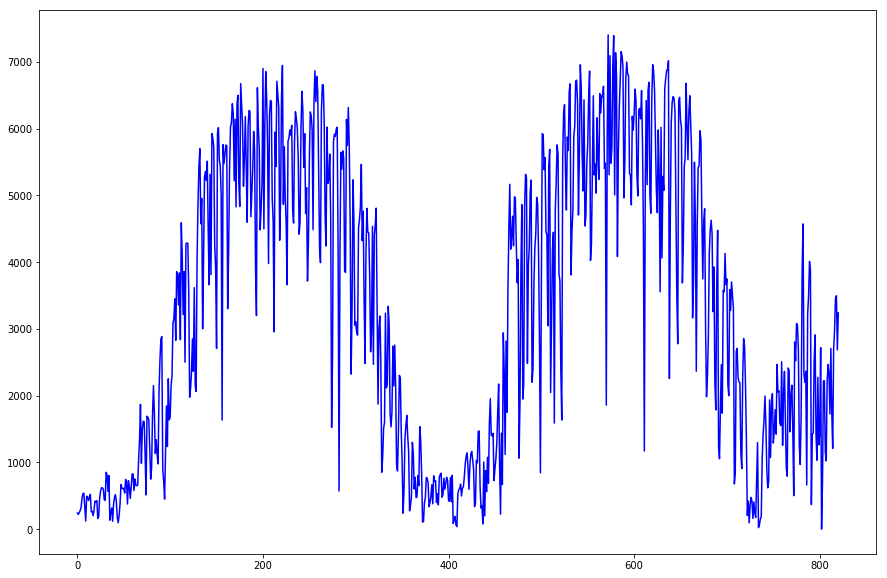

In [31]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(array(bikes['freq']).reshape(len(bikes['freq']), 1))
series = pd.DataFrame(scaled)
series.columns = ['freqscaled']
bikes = pd.merge(bikes, series, left_index=True, right_index=True)


bikes.to_csv('C:/Users/Davor/Desktop/Notebooks/bikes.csv')

plt.figure(figsize=(15,10))
plt.plot(bikes['freq'], color='blue')
plt.show()

In [32]:
bikes.head()

,starttime,freq,freqscaled
0,2016-01-01,241,0.032546
1,2016-01-02,220,0.029710
2,2016-01-03,245,0.033086
3,2016-01-04,276,0.037272
4,2016-01-05,325,0.043889


In [33]:
df = pd.DataFrame(bikes)
df.shape

(821, 3)

# anomalies

In [34]:
mean201606 = dataset201606['freq'].mean()
mean201607 = dataset201607['freq'].mean()
mean201608 = dataset201608['freq'].mean()
mean201609 = dataset201609['freq'].mean()
mean201610 = dataset201610['freq'].mean()
mean201704 = dataset201704['freq'].mean()
mean201705 = dataset201705['freq'].mean()
mean201706 = dataset201706['freq'].mean()
mean201707 = dataset201707['freq'].mean()
mean201708 = dataset201708['freq'].mean()
mean201709 = dataset201709['freq'].mean()
mean201710 = dataset201710['freq'].mean()
mean201711 = dataset201711['freq'].mean()
mean201802 = dataset201802['freq'].mean()
mean201803 = dataset201803['freq'].mean()

In [35]:
dataset201606['freq'][4] = mean201606
dataset201606['freq'][10] = mean201606
dataset201607['freq'][11] = mean201607
dataset201607['freq'][30] = mean201607
dataset201608['freq'][13] = mean201608
dataset201609['freq'][4] = mean201609
dataset201610['freq'][1] = mean201610
dataset201610['freq'][8] = mean201610
dataset201610['freq'][21] = mean201610
dataset201610['freq'][0] = mean201610
dataset201704['freq'][20] = mean201704
dataset201704['freq'][21] = mean201704
dataset201704['freq'][24] = mean201704
dataset201704['freq'][25] = mean201704
dataset201704['freq'][29] = mean201704
dataset201705['freq'][12] = mean201705
dataset201705['freq'][13] = mean201705
dataset201705['freq'][4] = mean201705
dataset201705['freq'][5] = mean201705
dataset201705['freq'][24] = mean201705
dataset201705['freq'][28] = mean201705
dataset201706['freq'][4] = mean201706
dataset201706['freq'][5] = mean201706
dataset201707['freq'][23] = mean201707
dataset201708['freq'][4] = mean201708
dataset201708['freq'][19] = mean201708
dataset201709['freq'][2] = mean201709
dataset201709['freq'][29] = mean201709
dataset201710['freq'][8] = mean201710
dataset201710['freq'][28] = mean201710
dataset201711['freq'][8] = mean201711
dataset201711['freq'][22] = mean201711
dataset201802['freq'][10] = mean201802
dataset201802['freq'][24] = mean201802
dataset201803['freq'][1] = mean201803
dataset201803['freq'][12] = mean201803

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imp

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying

# 2016 + 2017 + 2018.123

we get data with 821 rows and 2 columns

In [36]:
frames = [dataset201601, dataset201602, dataset201603, dataset201604, dataset201605, dataset201606, dataset201607, dataset201608, dataset201609, dataset201610, dataset201611, dataset201612, dataset201701, dataset201702, dataset201703, dataset201704, dataset201705, dataset201706, dataset201707, dataset201708, dataset201709, dataset201710, dataset201711, dataset201712, dataset201801, dataset201802, dataset201803]

bikes = pd.concat(frames)

bikes = bikes.reset_index(drop=True)

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


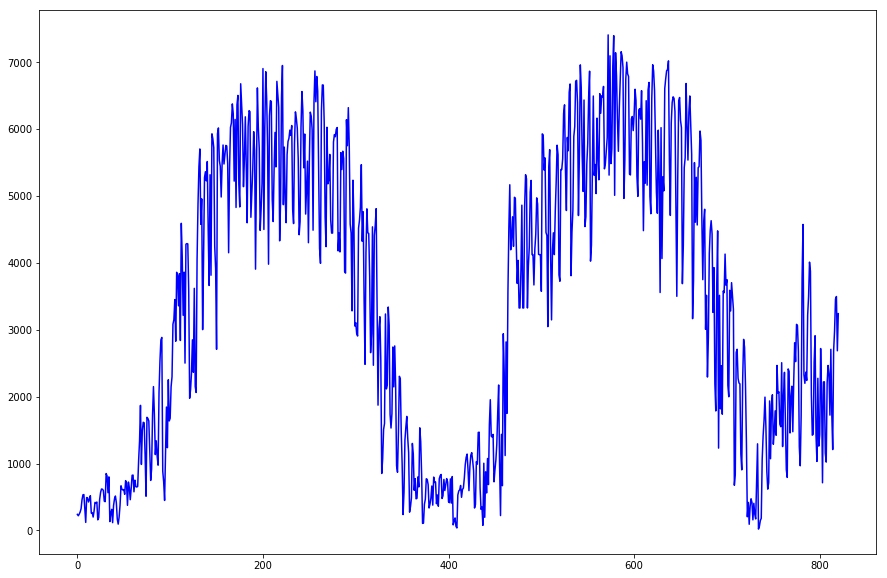

In [37]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(array(bikes['freq']).reshape(len(bikes['freq']), 1))
series = pd.DataFrame(scaled)
series.columns = ['freqscaled']
bikes = pd.merge(bikes, series, left_index=True, right_index=True)


bikes.to_csv('C:/Users/Davor/Desktop/Notebooks/bikes.csv')

plt.figure(figsize=(15,10))
plt.plot(bikes['freq'], color='blue')
plt.show()

In [38]:
#TESTIIIIIIIIIIIIIIIIIIIING


dataset201708



,starttime,freq
0,2017-08-01,7394
1,2017-08-02,5008
2,2017-08-03,7139
3,2017-08-04,6798
4,2017-08-05,6148
5,2017-08-06,5666
6,2017-08-07,6303
7,2017-08-08,6718
8,2017-08-09,7154
9,2017-08-10,7093


In [39]:
bikes.head()

,starttime,freq,freqscaled
0,2016-01-01,241,0.029794
1,2016-01-02,220,0.026950
2,2016-01-03,245,0.030336
3,2016-01-04,276,0.034534
4,2016-01-05,325,0.041170


In [40]:
bikes.max()

starttime     2018-03-31
freq                7405
freqscaled             1
dtype: object

In [41]:
df = pd.DataFrame(bikes)
df.shape

(821, 3)

In [42]:
data = pd.concat([bikes, weather], axis=1)


data.to_csv('C:/Users/Davor/Desktop/Notebooks/data.csv')

data = pd.read_csv("./data.csv")

In [43]:
data.head()

,Unnamed: 0,starttime,freq,freqscaled,Year,Month,Day,High Temp (F),Low Temp (F),High Dew Point (F),...,High Humidity (%),Low Humidity (%),High Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events
0,0,2016-01-01,241,0.029794,2016,1,1,41,33,27,...,70,46,10,8,23,13,32,0.0,0.0,None
1,1,2016-01-02,220,0.026950,2016,1,2,40,31,21,...,61,40,10,10,22,13,28,0.0,0.0,None
2,2,2016-01-03,245,0.030336,2016,1,3,44,31,24,...,69,43,10,10,21,12,28,0.0,0.0,None
3,3,2016-01-04,276,0.034534,2016,1,4,36,14,25,...,72,50,10,2,21,12,28,0.0,0.0,Snow
4,4,2016-01-05,325,0.041170,2016,1,5,26,8,4,...,58,27,10,10,18,10,23,0.0,0.0,None


In [44]:
df = pd.DataFrame(data)
df.shape

(821, 21)

# ---------------------------------------------------------------------------------------------------------------

# RNN Simple

# ---------------------------------------------------------------------------------------------------------------

 we need to delete "Unnamed" because everytime we read the .csv automatically we get an extra indexing column

In [45]:
data = pd.read_csv("./data.csv")

del data['Unnamed: 0']

data.head()

,starttime,freq,freqscaled,Year,Month,Day,High Temp (F),Low Temp (F),High Dew Point (F),Low Dew Point (F),High Humidity (%),Low Humidity (%),High Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events
0,2016-01-01,241,0.029794,2016,1,1,41,33,27,18,70,46,10,8,23,13,32,0.0,0.0,None
1,2016-01-02,220,0.026950,2016,1,2,40,31,21,17,61,40,10,10,22,13,28,0.0,0.0,None
2,2016-01-03,245,0.030336,2016,1,3,44,31,24,20,69,43,10,10,21,12,28,0.0,0.0,None
3,2016-01-04,276,0.034534,2016,1,4,36,14,25,2,72,50,10,2,21,12,28,0.0,0.0,Snow
4,2016-01-05,325,0.041170,2016,1,5,26,8,4,-5,58,27,10,10,18,10,23,0.0,0.0,None


# combined data - datatest

In [46]:
datatest = data

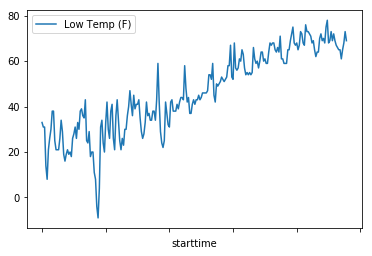

In [47]:
datatest[:24*10].plot(x='starttime', y='Low Temp (F)')

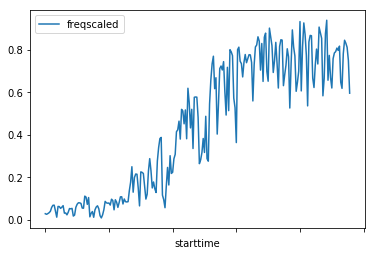

In [48]:
datatest[:24*10].plot(x='starttime', y='freqscaled')

In [49]:
#plt.xcorr(datatest.ix[:,2],datatest.ix[:,17],maxlags=820, usevlines=1)
#plt.show()

In [50]:
#fields = ['freq','Low Temp (F)']
#x = datatest[fields]
#x.head(10)

In [51]:
def df_derived_by_shift(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df

In [52]:
NON_DER = []
df_new = df_derived_by_shift(x, 10, NON_DER)

NameError: name 'x' is not defined

In [ ]:
df_new.head(10)

In [76]:
df_new = df_new.dropna()

NameError: name 'df_new' is not defined

In [77]:
df_new.head(10)

NameError: name 'df_new' is not defined

In [78]:
df_new.corr()

NameError: name 'df_new' is not defined

NameError: name 'df_new' is not defined

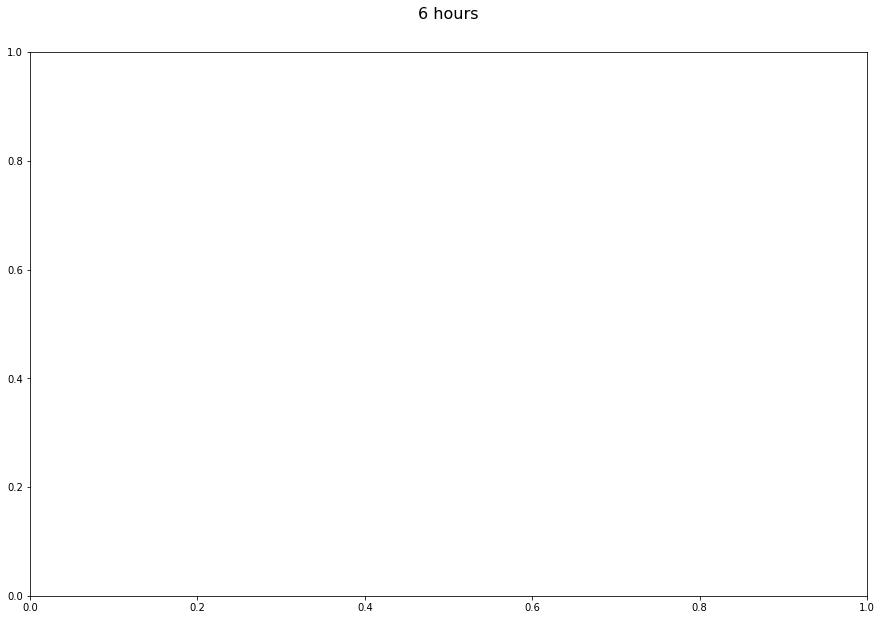

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(15,10))
plt.title(u'6 hours', y=1.05, size=16)

mask = np.zeros_like(df_new.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(df_new.corr(), mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [80]:
datatest['Low Temp (F)'].max()

78

(0.0, 1.0557692307692308)

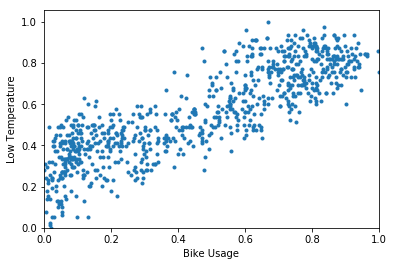

In [81]:
usage = datatest['freqscaled']
temperature = datatest['Low Temp (F)']/78

fig, ax = plt.subplots(1, 1)
ax.plot(usage, temperature, '.')
ax.set_xlabel('Bike Usage')
ax.set_ylabel('Low Temperature')
ax.set_xlim(0., 1.)
ax.set_ylim(0.)

In [82]:
from statistics import mean

def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

In [83]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs**2)))
    b = mean(ys) - m*mean(xs)
    return m, b

In [84]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

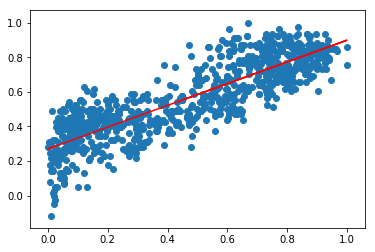

0.7278257733186797


In [85]:
m, b = best_fit_slope_and_intercept(usage,temperature)
regression_line = [(m*x + b) for x in usage]
plt.scatter(usage,temperature)
plt.plot(usage, regression_line, 'r')
plt.show()
r_squared = coefficient_of_determination(temperature,regression_line)
print(r_squared)

In [87]:
datatest['High Temp (F)'].max()

98

(0.0, 1.0438775510204081)

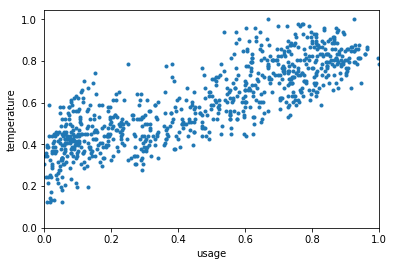

In [88]:
usage = datatest['freqscaled']
temperature = datatest['High Temp (F)']/98

fig, ax = plt.subplots(1, 1)
ax.plot(usage, temperature, '.')
ax.set_xlabel('usage')
ax.set_ylabel('temperature')
ax.set_xlim(0., 1.)
ax.set_ylim(0.)

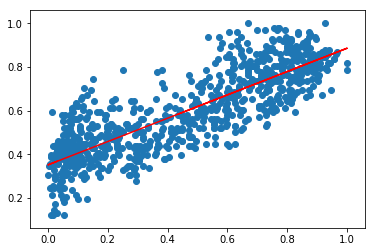

0.6914113376022786


In [89]:
m, b = best_fit_slope_and_intercept(usage,temperature)
regression_line = [(m*x + b) for x in usage]
plt.scatter(usage,temperature)
plt.plot(usage, regression_line, 'r')
plt.show()
r_squared = coefficient_of_determination(temperature,regression_line)
print(r_squared)

In [90]:
datatest['High Dew Point (F)'].max()

78

(0.0, 1.0583333333333333)

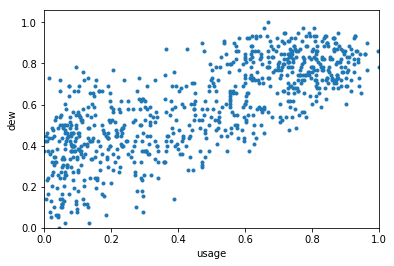

In [91]:
usage = datatest['freqscaled']
dew = datatest['High Dew Point (F)']/78

fig, ax = plt.subplots(1, 1)
ax.plot(usage, dew, '.')
ax.set_xlabel('usage')
ax.set_ylabel('dew')
ax.set_xlim(0., 1.)
ax.set_ylim(0.)

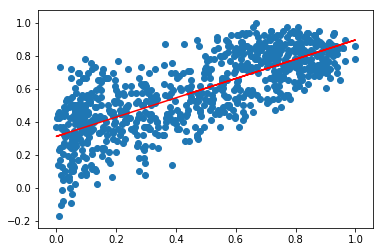

0.5772408684832167


In [92]:
m, b = best_fit_slope_and_intercept(usage,dew)
regression_line = [(m*x + b) for x in usage]
plt.scatter(usage,dew)
plt.plot(usage, regression_line, 'r')
plt.show()
r_squared = coefficient_of_determination(dew,regression_line)
print(r_squared)

In [93]:
datatest['Low Dew Point (F)'].max()

70

(0.0, 1.0678571428571428)

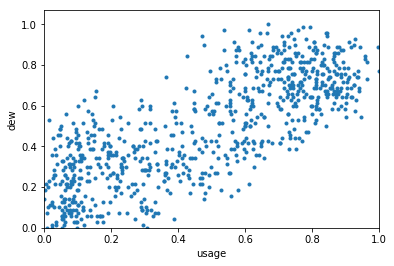

In [94]:
usage = datatest['freqscaled']
dew = datatest['Low Dew Point (F)']/70

fig, ax = plt.subplots(1, 1)
ax.plot(usage, dew, '.')
ax.set_xlabel('usage')
ax.set_ylabel('dew')
ax.set_xlim(0., 1.)
ax.set_ylim(0.)

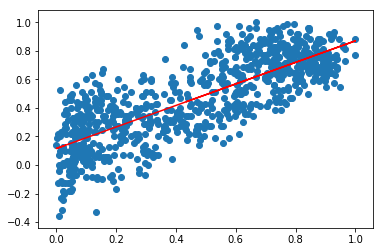

0.6208915092809677


In [95]:
m, b = best_fit_slope_and_intercept(usage,dew)
regression_line = [(m*x + b) for x in usage]
plt.scatter(usage,dew)
plt.plot(usage, regression_line, 'r')
plt.show()
r_squared = coefficient_of_determination(dew,regression_line)
print(r_squared)

In [96]:
datatest['High Humidity (%)'].max()

100

(0.0, 1.032)

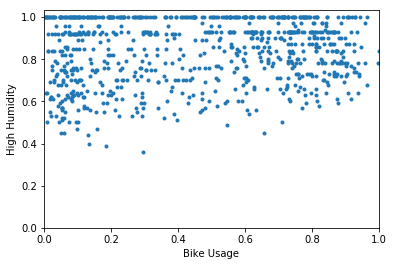

In [97]:
usage = datatest['freqscaled']
humidity = datatest['High Humidity (%)']/100

fig, ax = plt.subplots(1, 1)
ax.plot(usage, humidity, '.')
ax.set_xlabel('Bike Usage')
ax.set_ylabel('High Humidity')
ax.set_xlim(0., 1.)
ax.set_ylim(0.)

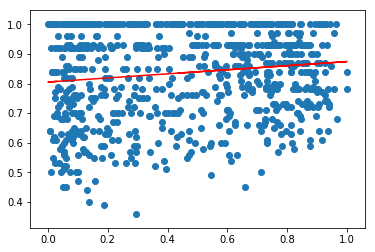

0.018873022035322595


In [98]:
m, b = best_fit_slope_and_intercept(usage,humidity)
regression_line = [(m*x + b) for x in usage]
plt.scatter(usage,humidity)
plt.plot(usage, regression_line, 'r')
plt.show()
r_squared = coefficient_of_determination(humidity,regression_line)
print(r_squared)

In [99]:
datatest['Low Humidity (%)'].max()

100

(0.0, 1.044)

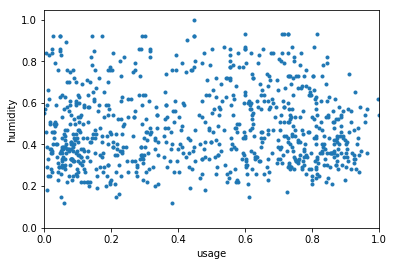

In [100]:
usage = datatest['freqscaled']
humidity = datatest['Low Humidity (%)']/100

fig, ax = plt.subplots(1, 1)
ax.plot(usage, humidity, '.')
ax.set_xlabel('usage')
ax.set_ylabel('humidity')
ax.set_xlim(0., 1.)
ax.set_ylim(0.)

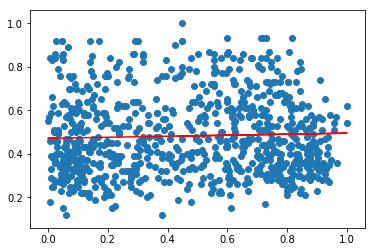

0.0014386835458154446


In [101]:
m, b = best_fit_slope_and_intercept(usage,humidity)
regression_line = [(m*x + b) for x in usage]
plt.scatter(usage,humidity)
plt.plot(usage, regression_line, 'r')
plt.show()
r_squared = coefficient_of_determination(humidity,regression_line)
print(r_squared)

In [102]:
datatest['High Visibility (mi)'].max()

10

(0.0, 1.044)

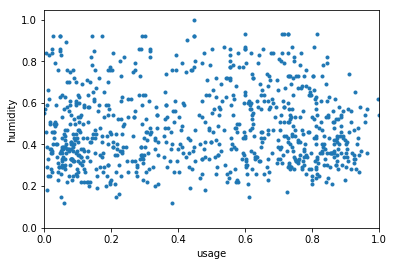

In [103]:
usage = datatest['freqscaled']
visibility = datatest['High Visibility (mi)']/10

fig, ax = plt.subplots(1, 1)
ax.plot(usage, humidity, '.')
ax.set_xlabel('usage')
ax.set_ylabel('humidity')
ax.set_xlim(0., 1.)
ax.set_ylim(0.)

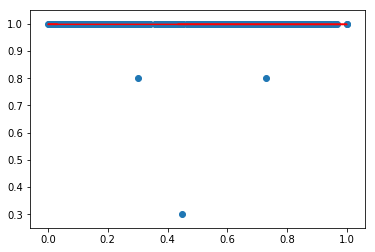

4.993336488734457e-06


In [104]:
m, b = best_fit_slope_and_intercept(usage,visibility)
regression_line = [(m*x + b) for x in usage]
plt.scatter(usage,visibility)
plt.plot(usage, regression_line, 'r')
plt.show()
r_squared = coefficient_of_determination(visibility,regression_line)
print(r_squared)

In [105]:
datatest['Low Visibility (mi)'].max()

10

(0.0, 1.05)

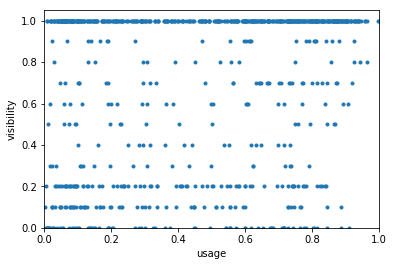

In [106]:
usage = datatest['freqscaled']
visibility = datatest['Low Visibility (mi)']/10

fig, ax = plt.subplots(1, 1)
ax.plot(usage, visibility, '.')
ax.set_xlabel('usage')
ax.set_ylabel('visibility')
ax.set_xlim(0., 1.)
ax.set_ylim(0.)

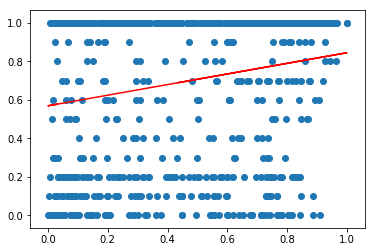

0.043489802661249355


In [107]:
m, b = best_fit_slope_and_intercept(usage,visibility)
regression_line = [(m*x + b) for x in usage]
plt.scatter(usage,visibility)
plt.plot(usage, regression_line, 'r')
plt.show()
r_squared = coefficient_of_determination(visibility,regression_line)
print(r_squared)

In [108]:
datatest['High Wind (mph)'].max()

53

(0.0, 1.0433962264150944)

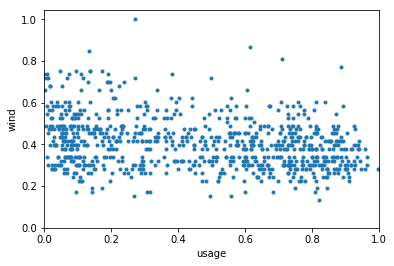

In [109]:
usage = datatest['freqscaled']
wind = datatest['High Wind (mph)']/53

fig, ax = plt.subplots(1, 1)
ax.plot(usage, wind, '.')
ax.set_xlabel('usage')
ax.set_ylabel('wind')
ax.set_xlim(0., 1.)
ax.set_ylim(0.)

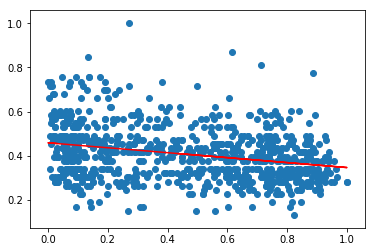

0.07481014953823728


In [110]:
m, b = best_fit_slope_and_intercept(usage,wind)
regression_line = [(m*x + b) for x in usage]
plt.scatter(usage,wind)
plt.plot(usage, regression_line, 'r')
plt.show()
r_squared = coefficient_of_determination(wind,regression_line)
print(r_squared)

In [111]:
datatest['Avg Wind (mph)'].max()

38

(0.0, 1.0460526315789473)

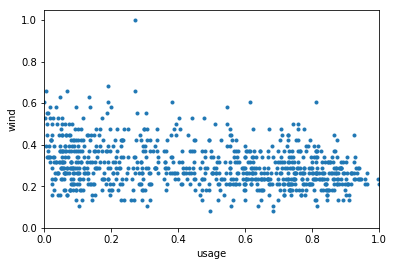

In [112]:
usage = datatest['freqscaled']
wind = datatest['Avg Wind (mph)']/38

fig, ax = plt.subplots(1, 1)
ax.plot(usage, wind, '.')
ax.set_xlabel('usage')
ax.set_ylabel('wind')
ax.set_xlim(0., 1.)
ax.set_ylim(0.)

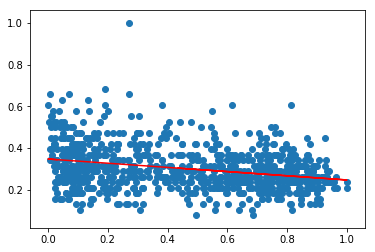

0.07990729177445965


In [113]:
m, b = best_fit_slope_and_intercept(usage,wind)
regression_line = [(m*x + b) for x in usage]
plt.scatter(usage,wind)
plt.plot(usage, regression_line, 'r')
plt.show()
r_squared = coefficient_of_determination(wind,regression_line)
print(r_squared)

In [114]:
datatest['High Wind Gust (mph)'].max()

70

(0.0, 1.05)

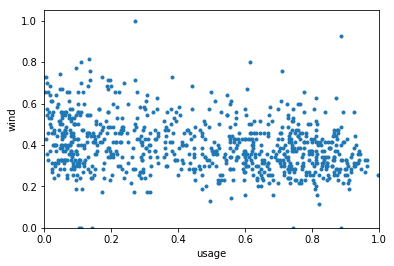

In [115]:
usage = datatest['freqscaled']
wind = datatest['High Wind Gust (mph)']/70

fig, ax = plt.subplots(1, 1)
ax.plot(usage, wind, '.')
ax.set_xlabel('usage')
ax.set_ylabel('wind')
ax.set_xlim(0., 1.)
ax.set_ylim(0.)

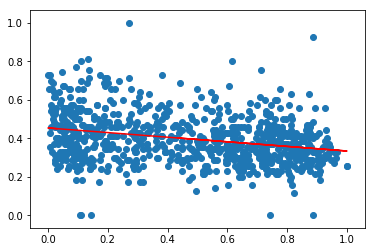

0.07667909130885997


In [116]:
m, b = best_fit_slope_and_intercept(usage,wind)
regression_line = [(m*x + b) for x in usage]
plt.scatter(usage,wind)
plt.plot(usage, regression_line, 'r')
plt.show()
r_squared = coefficient_of_determination(wind,regression_line)
print(r_squared)

In [117]:
datatest['Snowfall (in)'].max()

1.62

(0.0, 1.05)

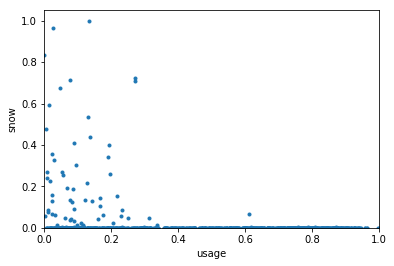

In [118]:
usage = datatest['freqscaled']
snow = datatest['Snowfall (in)']/1.62

fig, ax = plt.subplots(1, 1)
ax.plot(usage, snow, '.')
ax.set_xlabel('usage')
ax.set_ylabel('snow')
ax.set_xlim(0., 1.)
ax.set_ylim(0.)

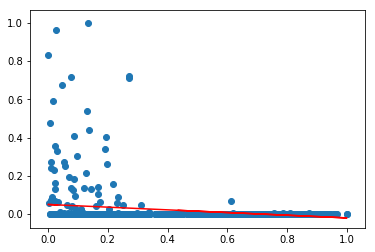

0.05167595979579198


In [119]:
m, b = best_fit_slope_and_intercept(usage,snow)
regression_line = [(m*x + b) for x in usage]
plt.scatter(usage,snow)
plt.plot(usage, regression_line, 'r')
plt.show()
r_squared = coefficient_of_determination(snow,regression_line)
print(r_squared)

In [120]:
datatest['Precip (in)'].max()

2.13

(0.0, 1.05)

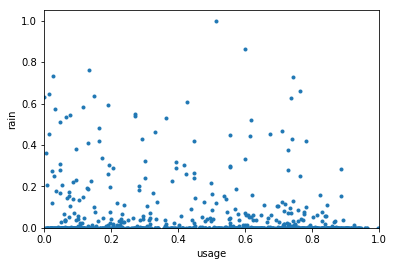

In [121]:
usage = datatest['freqscaled']
rain = datatest['Precip (in)']/2.13

fig, ax = plt.subplots(1, 1)
ax.plot(usage, rain, '.')
ax.set_xlabel('usage')
ax.set_ylabel('rain')
ax.set_xlim(0., 1.)
ax.set_ylim(0.)

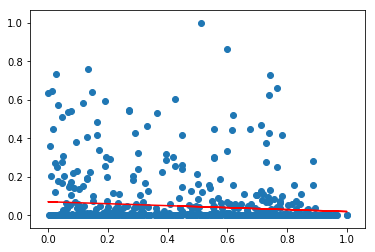

0.014230885353750944


In [122]:
m, b = best_fit_slope_and_intercept(usage,rain)
regression_line = [(m*x + b) for x in usage]
plt.scatter(usage,rain)
plt.plot(usage, regression_line, 'r')
plt.show()
r_squared = coefficient_of_determination(rain,regression_line)
print(r_squared)

In [53]:
dummy_fields = ['Year', 'Month', 'Day', 'Year']
for each in dummy_fields:
    dummies = pd.get_dummies(datatest[each], prefix=each, drop_first=False)
    datatest = pd.concat([datatest, dummies], axis=1)

fields_to_drop = ['Year', 'Month', 'Day','starttime', 'Events', 'High Dew Point (F)', 'Low Dew Point (F)', 'High Humidity (%)', 'Low Humidity (%)', 'High Visibility (mi)', 'Low Visibility (mi)', 'High Wind (mph)', 'Avg Wind (mph)', 'High Wind Gust (mph)', 'Snowfall (in)', 'Precip (in)' ]                # remove freq? you need to drop starttime!
datatest = datatest.drop(fields_to_drop, axis=1)
datatest.head()

,freq,freqscaled,High Temp (F),Low Temp (F),Year_2016,Year_2017,Year_2018,Month_1,Month_2,Month_3,...,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Year_2016,Year_2017,Year_2018
0,241,0.029794,41,33,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,220,0.026950,40,31,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,245,0.030336,44,31,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,276,0.034534,36,14,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,325,0.041170,26,8,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
dummies.head()

,Year_2016,Year_2017,Year_2018
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [55]:
datatest.head()

,freq,freqscaled,High Temp (F),Low Temp (F),Year_2016,Year_2017,Year_2018,Month_1,Month_2,Month_3,...,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Year_2016,Year_2017,Year_2018
0,241,0.029794,41,33,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,220,0.026950,40,31,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,245,0.030336,44,31,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,276,0.034534,36,14,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,325,0.041170,26,8,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [56]:
quant_features = ['freq']
#quant_features = ['freq','High Temp (F)', 'Low Temp (F)']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = datatest[each].mean(), datatest[each].std()
    scaled_features[each] = [mean, std]
    datatest.loc[:, each] = (datatest[each] - mean)/std                  #put freq in quant_features!!!

In [57]:
scaled_features

{'freq': [3407.9512789281366, 2191.8839329837133]}

In [58]:
datatest.head()

,freq,freqscaled,High Temp (F),Low Temp (F),Year_2016,Year_2017,Year_2018,Month_1,Month_2,Month_3,...,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Year_2016,Year_2017,Year_2018
0,-1.444854,0.029794,41,33,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-1.454434,0.026950,40,31,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-1.443029,0.030336,44,31,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-1.428886,0.034534,36,14,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-1.406530,0.041170,26,8,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
#test_data = datatest[-21*24:]               # from 21*24 = 504 to the end
#data_real = datatest[:-21*24]               #  from 0 to 504


test_data = datatest[500:]               
data_real = datatest[:500]

# Separate the data into features and targets
target_fields = ['freq']                                                                     # freq
features, targets = data_real.drop(target_fields, axis=1), data_real[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

In [60]:
# Hold out the last 60 days of the remaining data as a validation set
#train_features, train_targets = features[:-3*24], targets[:-3*24]
#val_features, val_targets = features[-3*24:], targets[-3*24:]

train_features, train_targets = features[:-321], targets[:-321]
val_features, val_targets = features[-321:], targets[-321:]

In [61]:
import numpy as np
from pdb import set_trace


class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes**-0.5,
                                       (self.hidden_nodes, self.input_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5,
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate

        #### Set this to your implemented sigmoid function ####
        # Activation function is the sigmoid function
        self.activation_function = self.sigmoid

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, inputs_list, targets_list):
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        # TODO: Output layer
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)  # signals into final output layer
        final_outputs = final_inputs  # signals from final output layer

        #### Implement the backward pass here ####
        ### Backward pass ###

        # TODO: Output error
        output_errors = (targets - final_outputs)  # Output layer error is the difference between desired target and actual output.

        # TODO: Backpropagated error
        hidden_errors = self.weights_hidden_to_output.T.dot(output_errors) * hidden_outputs * (1 - hidden_outputs)  # errors propagated to the hidden layer

        output_grad = self.lr * output_errors.dot(hidden_outputs.T)
        hidden_grad = self.lr * hidden_errors.dot(inputs.T)

        # TODO: Update the weights
        self.weights_hidden_to_output += output_grad  # update hidden-to-output weights with gradient descent step
        self.weights_input_to_hidden += hidden_grad   # update input-to-hidden weights with gradient descent step

    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T

        #### Implement the forward pass here ####
        # TODO: Hidden layer
        hidden_inputs = np.dot(self.weights_input_to_hidden, inputs)  # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)  # signals from hidden layer
        # TODO: Output layer
        final_inputs = np.dot(self.weights_hidden_to_output, hidden_outputs)   # signals into final output layer
        final_outputs = final_inputs  # signals from final output layer

        return final_outputs

In [62]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [63]:
import sys

import time

start = time.time()

### Set the hyperparameters here ###
epochs = 2500                                    #3000
learning_rate = .001                                 #0.001
hidden_nodes = 30                            #10
output_nodes = 1

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for e in range(epochs):
                                                            # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    for record, target in zip(train_features.ix[batch].values, 
                              train_targets.ix[batch]['freq']):            #freq
        network.train(record, target)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features), train_targets['freq'].values)              #freq
    val_loss = MSE(network.run(val_features), val_targets['freq'].values)                    #freq
    sys.stdout.write("\rProgress: " + str(100 * e/float(epochs))[:4] \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)
    
end = time.time()
print("    time:", end-start)

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


Progress: 99.9% ... Training loss: 0.023 ... Validation loss: 0.638    time: 13.960623025894165


(-0.05081940373560645, 4)

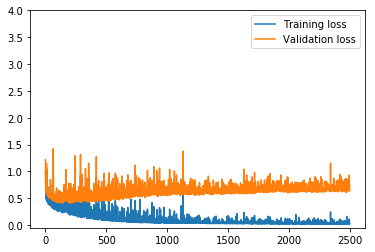

In [64]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
plt.ylim(ymax=4)

(-0.05081940373560645, 1.5)

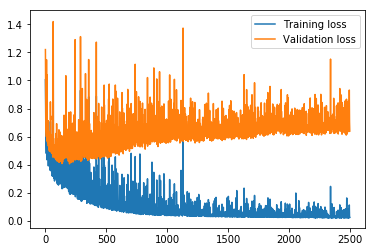

In [65]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
plt.ylim(ymax=1.5)

In [66]:
datatest.head()

,freq,freqscaled,High Temp (F),Low Temp (F),Year_2016,Year_2017,Year_2018,Month_1,Month_2,Month_3,...,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Year_2016,Year_2017,Year_2018
0,-1.444854,0.029794,41,33,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-1.454434,0.026950,40,31,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-1.443029,0.030336,44,31,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-1.428886,0.034534,36,14,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-1.406530,0.041170,26,8,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


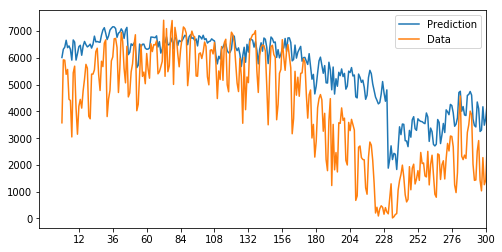

In [67]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['freq']                 #freq
predictions = network.run(test_features)*std + mean
ax.plot(predictions[0], label='Prediction')
#plt.xlabel("Days")
#plt.ylabel("Bike Usage")
ax.plot((test_targets['freq']*std + mean).values, label='Data')       #freq
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(datatest.iloc[test_data.index]['freq'])         #freqscaled
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
#_ = ax.set_xticklabels(dates[12::24], rotation=90)

In [68]:
pred = predictions

In [69]:
real = test_targets['freq']*std + mean
real = np.array(real)

In [70]:
realm = real.mean()
realm

4054.735202492212

In [71]:
rpmae = real - pred
rpmae = np.absolute(rpmae)
rpmae = rpmae.mean()
rpmae

1452.7997908331615

In [72]:
correctness = 100 - 100*rpmae/realm
correctness

64.17029181239235

In [73]:
mse = real - pred
mse = mse**2
mse = mse.mean()
print(mse)
rmse = math.sqrt(mse)
print(rmse)
#rmse = math.sqrt(mean_squared_error(real, pred))
#rmse

3061990.4833529266
1749.8544177596393


# ---------------------------------------------------------------------------------------------------------------

# RNN Deep

# ---------------------------------------------------------------------------------------------------------------

In [26]:
data = pd.read_csv("./data.csv")

del data['Unnamed: 0']

data.head()

,starttime,freq,freqscaled,Year,Month,Day,High Temp (F),Low Temp (F),High Dew Point (F),Low Dew Point (F),High Humidity (%),Low Humidity (%),High Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events
0,2016-01-01,241,0.029794,2016,1,1,41,33,27,18,70,46,10,8,23,13,32,0.0,0.0,None
1,2016-01-02,220,0.026950,2016,1,2,40,31,21,17,61,40,10,10,22,13,28,0.0,0.0,None
2,2016-01-03,245,0.030336,2016,1,3,44,31,24,20,69,43,10,10,21,12,28,0.0,0.0,None
3,2016-01-04,276,0.034534,2016,1,4,36,14,25,2,72,50,10,2,21,12,28,0.0,0.0,Snow
4,2016-01-05,325,0.041170,2016,1,5,26,8,4,-5,58,27,10,10,18,10,23,0.0,0.0,None


In [44]:
number_of_test_data = 321
number_of_holdout_data = 60
number_of_training_data = len(data) - number_of_holdout_data - number_of_test_data
print ("total, train, test, holdout:", len(data), number_of_training_data, number_of_test_data, number_of_holdout_data)

total, train, test, holdout: 821 440 321 60


In [45]:
datatrain = data[:number_of_training_data]
datatest = data[-(number_of_test_data+number_of_holdout_data):-number_of_holdout_data]
datahold = data[-number_of_holdout_data:]

In [46]:
in_seq1 = array(datatrain['freqscaled'])
#in_seq2= array(datatrain['High Temp (F)'])
#in_seq3 = array(datatrain['Low Temp (F)'])
out_seq_train = array(datatrain['freqscaled'])

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
#in_seq2 = in_seq2.reshape((len(in_seq2), 1))
#in_seq3 = in_seq3.reshape((len(in_seq3), 1))
out_seq_train = out_seq_train.reshape((len(out_seq_train), 1))

datatrain_feed = hstack((in_seq1, out_seq_train))

In [47]:
in_seq1 = array(datatest['freqscaled'])
#in_seq2 = array(datatest['High Temp (F)'])
#in_seq3 = array(datatest['Low Temp (F)'])
out_seq_test = array(datatest['freqscaled'])

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
#in_seq2 = in_seq2.reshape((len(in_seq2), 1))
#in_seq3 = in_seq3.reshape((len(in_seq3), 1))
out_seq_test = out_seq_test.reshape((len(out_seq_test), 1))

datatest_feed = hstack((in_seq1, out_seq_test))

In [48]:
in_seq1 = array(datahold['freqscaled'])
#in_seq2 = array(datahold['High Temp (F)'])
#in_seq3 = array(datahold['Low Temp (F)'])
out_seq_hold = array(datahold['freqscaled'])

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
#in_seq2 = in_seq2.reshape((len(in_seq2), 1))
#in_seq3 = in_seq3.reshape((len(in_seq3), 1))
out_seq_hold = out_seq_hold.reshape((len(out_seq_hold), 1))

datahold_feed = hstack((in_seq1, out_seq_hold))

In [49]:
n_features = datatrain_feed.shape[1]
n_input = 10
generator_train = TimeseriesGenerator(datatrain_feed, out_seq_train, length=n_input, batch_size=len(datatrain_feed))

for i in range(len(generator_train)):
    x, y = generator_train[i]
    #print('%s => %s' % (x, y))

generator_test = TimeseriesGenerator(datatest_feed, out_seq_test, length=n_input, batch_size=1)

for i in range(len(generator_test)):
    x, y = generator_test[i]
    #print('%s => %s' % (x, y))

generator_hold = TimeseriesGenerator(datahold_feed, out_seq_hold, length=n_input, batch_size=1)

for i in range(len(generator_hold)):
    x, y = generator_hold[i]
    #print('%s => %s' % (x, y))

In [50]:
print("timesteps, features:", n_input, n_features)

timesteps, features: 10 2


In [51]:
model = Sequential()

model.add(SimpleRNN(24, activation='relu', input_shape=(n_input, n_features), return_sequences = True))
model.add(SimpleRNN(12, activation='tanh', input_shape=(n_input, n_features), return_sequences = True))       
model.add(SimpleRNN(8, activation='tanh', input_shape=(n_input, n_features), return_sequences = True))       #4 relu
model.add(SimpleRNN(8, activation='relu', input_shape=(n_input, n_features), return_sequences = False))

model.add(Dense(1, activation='relu'))                                                                        #1 tanh

adam = Adam(lr=0.001)                                                                         #ADAM!!!!!!!
model.compile(optimizer=adam, loss='mse')

In [52]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 10, 24)            648       
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 10, 12)            444       
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 10, 8)             168       
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 1,405
Trainable params: 1,405
Non-trainable params: 0
_________________________________________________________________


In [53]:
import time

start = time.time()

score = model.fit_generator(generator_train, epochs=400, verbose=2, validation_data=generator_test)      #EPOCHS!!! verbose is 2


end = time.time()

Epoch 1/400
 - 1s - loss: 0.1994 - val_loss: 0.2572
Epoch 2/400
 - 0s - loss: 0.1635 - val_loss: 0.2113
Epoch 3/400
 - 0s - loss: 0.1326 - val_loss: 0.1833
Epoch 4/400
 - 0s - loss: 0.1131 - val_loss: 0.1589
Epoch 5/400
 - 0s - loss: 0.0964 - val_loss: 0.1362
Epoch 6/400
 - 0s - loss: 0.0816 - val_loss: 0.1154
Epoch 7/400
 - 0s - loss: 0.0686 - val_loss: 0.0979
Epoch 8/400
 - 0s - loss: 0.0579 - val_loss: 0.0837
Epoch 9/400
 - 0s - loss: 0.0498 - val_loss: 0.0722
Epoch 10/400
 - 0s - loss: 0.0435 - val_loss: 0.0633
Epoch 11/400
 - 0s - loss: 0.0389 - val_loss: 0.0560
Epoch 12/400
 - 0s - loss: 0.0348 - val_loss: 0.0493
Epoch 13/400
 - 0s - loss: 0.0309 - val_loss: 0.0431
Epoch 14/400
 - 0s - loss: 0.0273 - val_loss: 0.0376
Epoch 15/400
 - 0s - loss: 0.0242 - val_loss: 0.0332
Epoch 16/400
 - 0s - loss: 0.0218 - val_loss: 0.0301
Epoch 17/400
 - 0s - loss: 0.0203 - val_loss: 0.0282
Epoch 18/400
 - 0s - loss: 0.0195 - val_loss: 0.0271
Epoch 19/400
 - 0s - loss: 0.0193 - val_loss: 0.0266
Ep

Epoch 155/400
 - 1s - loss: 0.0086 - val_loss: 0.0159
Epoch 156/400
 - 1s - loss: 0.0085 - val_loss: 0.0159
Epoch 157/400
 - 1s - loss: 0.0085 - val_loss: 0.0159
Epoch 158/400
 - 1s - loss: 0.0085 - val_loss: 0.0159
Epoch 159/400
 - 1s - loss: 0.0085 - val_loss: 0.0159
Epoch 160/400
 - 1s - loss: 0.0085 - val_loss: 0.0158
Epoch 161/400
 - 1s - loss: 0.0085 - val_loss: 0.0159
Epoch 162/400
 - 1s - loss: 0.0085 - val_loss: 0.0158
Epoch 163/400
 - 1s - loss: 0.0084 - val_loss: 0.0158
Epoch 164/400
 - 1s - loss: 0.0084 - val_loss: 0.0158
Epoch 165/400
 - 1s - loss: 0.0084 - val_loss: 0.0158
Epoch 166/400
 - 1s - loss: 0.0084 - val_loss: 0.0158
Epoch 167/400
 - 1s - loss: 0.0084 - val_loss: 0.0158
Epoch 168/400
 - 1s - loss: 0.0084 - val_loss: 0.0158
Epoch 169/400
 - 1s - loss: 0.0083 - val_loss: 0.0158
Epoch 170/400
 - 1s - loss: 0.0083 - val_loss: 0.0157
Epoch 171/400
 - 1s - loss: 0.0083 - val_loss: 0.0158
Epoch 172/400
 - 0s - loss: 0.0083 - val_loss: 0.0157
Epoch 173/400
 - 1s - loss: 

Epoch 307/400
 - 1s - loss: 0.0071 - val_loss: 0.0152
Epoch 308/400
 - 1s - loss: 0.0071 - val_loss: 0.0151
Epoch 309/400
 - 1s - loss: 0.0071 - val_loss: 0.0152
Epoch 310/400
 - 1s - loss: 0.0071 - val_loss: 0.0151
Epoch 311/400
 - 1s - loss: 0.0071 - val_loss: 0.0152
Epoch 312/400
 - 1s - loss: 0.0070 - val_loss: 0.0151
Epoch 313/400
 - 1s - loss: 0.0070 - val_loss: 0.0152
Epoch 314/400
 - 1s - loss: 0.0070 - val_loss: 0.0151
Epoch 315/400
 - 1s - loss: 0.0070 - val_loss: 0.0153
Epoch 316/400
 - 1s - loss: 0.0071 - val_loss: 0.0151
Epoch 317/400
 - 1s - loss: 0.0071 - val_loss: 0.0155
Epoch 318/400
 - 1s - loss: 0.0072 - val_loss: 0.0152
Epoch 319/400
 - 1s - loss: 0.0074 - val_loss: 0.0159
Epoch 320/400
 - 1s - loss: 0.0075 - val_loss: 0.0153
Epoch 321/400
 - 1s - loss: 0.0075 - val_loss: 0.0157
Epoch 322/400
 - 1s - loss: 0.0074 - val_loss: 0.0151
Epoch 323/400
 - 1s - loss: 0.0071 - val_loss: 0.0152
Epoch 324/400
 - 1s - loss: 0.0069 - val_loss: 0.0153
Epoch 325/400
 - 1s - loss: 

In [54]:
elapsed = end - start
elapsed

210.2399775981903

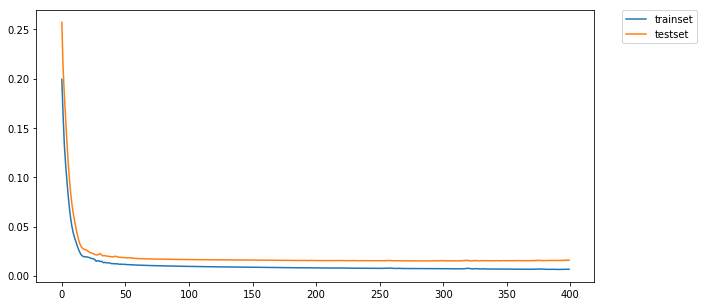

In [55]:
losses = score.history['loss']
val_losses = score.history['val_loss']
plt.figure(figsize=(10,5))
plt.plot(losses, label="trainset")
plt.plot(val_losses, label="testset")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [56]:
df_result = pd.DataFrame({'Actual' : [], 'Prediction' : []})


for i in range(len(generator_test)):
    x, y = generator_test[i]
    x_input = array(x).reshape((1, n_input, n_features))
    yhat = model.predict(x_input, verbose=2)
    df_result = df_result.append({'Actual': scaler.inverse_transform(y)[0][0], 'Prediction': scaler.inverse_transform(yhat)[0][0]}, ignore_index=True)

In [57]:
df_result['Diff'] = 100 * (df_result['Prediction'] - df_result['Actual']) / df_result['Actual']


In [58]:
pd.options.display.max_rows=1000
df_result

,Actual,Prediction,Diff
0,905.0,560.318787,-38.086322
1,1051.0,700.821533,-33.318598
2,1288.0,827.423584,-35.759039
3,1763.0,1187.763672,-32.628266
4,2174.0,1102.762085,-49.274973
5,979.0,1533.979370,56.688393
6,223.0,1034.238159,363.783928
7,1437.0,314.365326,-78.123499
8,669.0,1048.110962,56.668305
9,2940.0,1150.371582,-60.871715


In [59]:
mean = df_result['Actual'].mean()
mae = (df_result['Actual'] - df_result['Prediction']).abs().mean()

mse = (df_result['Actual'] - df_result['Prediction'])
mse = mse**2
mse = mse.mean()
rmse = math.sqrt(mse)

print("mse: ", mse)
print("rmse: ", rmse)
print("mean: ", mean)
print("mae:", mae)
print("mae/mean ratio: ", 100*mae/mean,"%")
print("correctness: ", 100 - 100*mae/mean,"%")

mse:  868494.882613022
rmse:  931.930728441241
mean:  4318.263665594855
mae: 741.6227198659033
mae/mean ratio:  17.17409536093582 %
correctness:  82.82590463906418 %


In [60]:
#print(cross_val_score(score, df_result['Actual'], df_result['Prediction'], cv=3))  

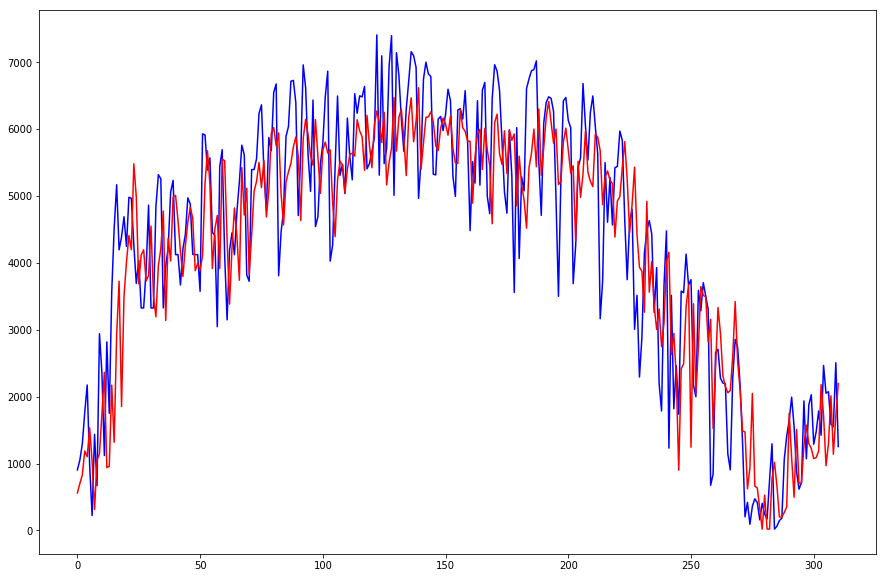

In [61]:
plt.figure(figsize=(15,10))
plt.plot(df_result['Actual'], color='blue')
plt.plot(df_result['Prediction'], color='red')
plt.show()

In [62]:
df_result = pd.DataFrame({'Actual' : [], 'Prediction' : []})

for i in range(len(generator_hold)):
    x, y = generator_hold[i]
    x_input = array(x).reshape((1, n_input, n_features))
    yhat = model.predict(x_input, verbose=2)
    df_result = df_result.append({'Actual': scaler.inverse_transform(y)[0][0], 'Prediction': scaler.inverse_transform(yhat)[0][0]}, ignore_index=True)

In [63]:
df_result['Diff'] = 100 * (df_result['Prediction'] - df_result['Actual']) / df_result['Actual']
df_result

,Actual,Prediction,Diff
0,1476.0,1856.996582,25.812777
1,2242.0,1853.066772,-17.347602
2,2804.0,2341.292480,-16.501695
3,2523.0,2986.271729,18.361939
4,3080.0,2191.962402,-28.832390
5,3063.0,2231.798096,-27.136856
6,2679.0,2264.591553,-15.468774
7,1252.0,2888.930176,130.745222
8,967.0,1238.114868,28.036698
9,1715.0,1319.694092,-23.049907


In [64]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_result)

    Actual   Prediction        Diff
0   1476.0  1856.996582   25.812777
1   2242.0  1853.066772  -17.347602
2   2804.0  2341.292480  -16.501695
3   2523.0  2986.271729   18.361939
4   3080.0  2191.962402  -28.832390
5   3063.0  2231.798096  -27.136856
6   2679.0  2264.591553  -15.468774
7   1252.0  2888.930176  130.745222
8    967.0  1238.114868   28.036698
9   1715.0  1319.694092  -23.049907
10  3775.0  2672.175537  -29.213893
11  4573.0  3035.192871  -33.627971
12  2327.0  3756.532715   61.432433
13  2199.0  2675.557373   21.671549
14  2366.0  1669.427002  -29.440955
15  2242.0  1956.966064  -12.713378
16  3217.0  2811.422119  -12.607332
17  3500.0  2285.294678  -34.705866
18  4010.0  3634.912354   -9.353807
19  3875.0  3582.019775   -7.560780
20  2031.0  2563.649658   26.225980
21  1424.0  2755.832764   93.527582
22  1439.0  1706.334229   18.577778
23  2518.0  2135.839844  -15.177131
24  2910.0  2693.645264   -7.434871
25  1424.0  3103.656006  117.953371
26  1032.0  1928.401611   86

In [65]:
mean = df_result['Actual'].mean()
mae = (df_result['Actual'] - df_result['Prediction']).abs().mean()

mse = (df_result['Actual'] - df_result['Prediction'])
mse = mse**2
mse = mse.mean()
rmse = math.sqrt(mse)

print("mse: ", mse)
print("rmse: ", rmse)
print("mean: ", mean)
print("mae:", mae)
print("mae/mean ratio: ", 100*mae/mean,"%")
print("correctness: ", 100 - 100*mae/mean,"%")

mse:  924833.4796664683
rmse:  961.6826293879225
mean:  2333.36
mae: 823.8378967285156
mae/mean ratio:  35.3069349233944 %
correctness:  64.69306507660559 %


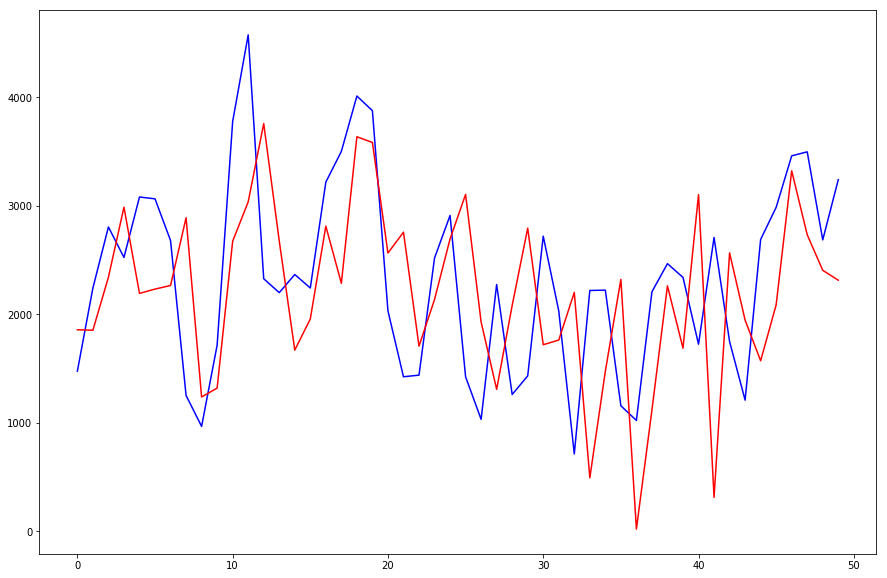

In [66]:
plt.figure(figsize=(15,10))
plt.plot(df_result['Actual'], color='blue')
plt.plot(df_result['Prediction'], color='red')
plt.show()

# ---------------------------------------------------------------------------------------------------------------

# TEST

# ---------------------------------------------------------------------------------------------------------------

In [102]:
number_of_test_data = 420
number_of_holdout_data = 50
number_of_training_data = len(data) - number_of_holdout_data - number_of_test_data
print ("total, train, test, holdout:", len(data), number_of_training_data, number_of_test_data, number_of_holdout_data)

total, train, test, holdout: 821 351 420 50


In [103]:
datatrain = data[:number_of_training_data]
datatest = data[-(number_of_test_data+number_of_holdout_data):-number_of_holdout_data]
datahold = data[-number_of_holdout_data:]

In [104]:
in_seq1 = array(datatrain['High Temp (F)'])
in_seq2 = array(datatrain['Low Temp (F)'])
in_seq3 = array(datatrain['freq'])
out_seq_train = array(datatrain['freq'])

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
out_seq_train = out_seq_train.reshape((len(out_seq_train), 1))

datatrain_feed = hstack((in_seq1, in_seq2, in_seq3, out_seq_train))

In [105]:
in_seq1 = array(datatest['High Temp (F)'])
in_seq2 = array(datatest['Low Temp (F)'])
in_seq3 = array(datatest['freq'])
out_seq_test = array(datatest['freq'])

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
out_seq_test = out_seq_test.reshape((len(out_seq_test), 1))

datatest_feed = hstack((in_seq1, in_seq2, in_seq3, out_seq_test))

In [106]:
in_seq1 = array(datahold['High Temp (F)'])
in_seq2 = array(datahold['Low Temp (F)'])
in_seq3 = array(datahold['freq'])
out_seq_hold = array(datahold['freq'])

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
out_seq_hold = out_seq_hold.reshape((len(out_seq_hold), 1))

datahold_feed = hstack((in_seq1, in_seq2, in_seq3, out_seq_hold))

In [107]:
n_features = datatrain_feed.shape[1]
n_input = 10
generator_train = TimeseriesGenerator(datatrain_feed, out_seq_train, length=n_input, batch_size=len(datatrain_feed))

for i in range(len(generator_train)):
    x, y = generator_train[i]
    #print('%s => %s' % (x, y))

generator_test = TimeseriesGenerator(datatest_feed, out_seq_test, length=n_input, batch_size=1)

for i in range(len(generator_test)):
    x, y = generator_test[i]
    #print('%s => %s' % (x, y))

generator_hold = TimeseriesGenerator(datahold_feed, out_seq_hold, length=n_input, batch_size=1)

for i in range(len(generator_hold)):
    x, y = generator_hold[i]
    #print('%s => %s' % (x, y))

In [108]:
print("timesteps, features:", n_input, n_features)

timesteps, features: 10 4


In [109]:
model = Sequential()

#model.add(SimpleRNN(4, activation='relu', input_shape=(n_input, n_features), return_sequences = True))
model.add(SimpleRNN(4, activation='relu', input_shape=(n_input, n_features), return_sequences = False))       #4 relu
model.add(Dense(1, activation='relu'))                                                                        #1 tanh

adam = Adam(lr=0.001)                                                                         #ADAM!!!!!!!
model.compile(optimizer=adam, loss='mse')

In [110]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_7 (SimpleRNN)     (None, 4)                 36        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [111]:
import time

start = time.time()

score = model.fit_generator(generator_train, epochs=300, verbose=2, validation_data=generator_test)      #EPOCHS!!! verbose is 2


end = time.time()

Epoch 1/300
 - 1s - loss: 8268233.0000 - val_loss: 7898668.3685
Epoch 2/300
 - 0s - loss: 8146192.0000 - val_loss: 7780081.1770
Epoch 3/300
 - 0s - loss: 8024877.0000 - val_loss: 7662418.7123
Epoch 4/300
 - 0s - loss: 7904488.5000 - val_loss: 7552806.8109
Epoch 5/300
 - 0s - loss: 7792162.5000 - val_loss: 7437056.5997
Epoch 6/300
 - 0s - loss: 7673067.5000 - val_loss: 7322065.2818
Epoch 7/300
 - 0s - loss: 7554766.5000 - val_loss: 7210563.4990
Epoch 8/300
 - 0s - loss: 7439743.0000 - val_loss: 7097678.0253
Epoch 9/300
 - 0s - loss: 7322825.0000 - val_loss: 6985694.8767
Epoch 10/300
 - 0s - loss: 7206634.0000 - val_loss: 6874590.1867
Epoch 11/300
 - 0s - loss: 7091428.0000 - val_loss: 6764421.6786
Epoch 12/300
 - 0s - loss: 6977332.5000 - val_loss: 6655359.3224
Epoch 13/300
 - 0s - loss: 6864012.5000 - val_loss: 6547495.1697
Epoch 14/300
 - 0s - loss: 6751815.5000 - val_loss: 6440667.5467
Epoch 15/300
 - 0s - loss: 6640757.0000 - val_loss: 6334883.8473
Epoch 16/300
 - 0s - loss: 6530983

Epoch 127/300
 - 0s - loss: 957718.5000 - val_loss: 934391.3021
Epoch 128/300
 - 0s - loss: 950646.8750 - val_loss: 927789.7108
Epoch 129/300
 - 0s - loss: 943918.6250 - val_loss: 921487.3375
Epoch 130/300
 - 0s - loss: 937498.1875 - val_loss: 915518.3021
Epoch 131/300
 - 0s - loss: 931410.7500 - val_loss: 909840.8883
Epoch 132/300
 - 0s - loss: 925627.1875 - val_loss: 904446.3053
Epoch 133/300
 - 0s - loss: 920137.3125 - val_loss: 899326.8319
Epoch 134/300
 - 0s - loss: 914931.5000 - val_loss: 894455.1386
Epoch 135/300
 - 0s - loss: 909999.5625 - val_loss: 889856.1003
Epoch 136/300
 - 0s - loss: 905346.8125 - val_loss: 885502.2822
Epoch 137/300
 - 0s - loss: 900945.1875 - val_loss: 881380.0399
Epoch 138/300
 - 0s - loss: 896783.3750 - val_loss: 877481.5662
Epoch 139/300
 - 0s - loss: 892850.6875 - val_loss: 873797.0651
Epoch 140/300
 - 0s - loss: 889137.0625 - val_loss: 870326.5092
Epoch 141/300
 - 0s - loss: 885635.0000 - val_loss: 867067.2435
Epoch 142/300
 - 0s - loss: 882332.6875 

 - 0s - loss: 803975.6250 - val_loss: 785371.8976
Epoch 256/300
 - 0s - loss: 803544.7500 - val_loss: 784760.2672
Epoch 257/300
 - 0s - loss: 803116.6875 - val_loss: 784151.7646
Epoch 258/300
 - 0s - loss: 802699.3750 - val_loss: 783550.2224
Epoch 259/300
 - 0s - loss: 802306.3750 - val_loss: 782955.0060
Epoch 260/300
 - 0s - loss: 801921.8750 - val_loss: 782366.9957
Epoch 261/300
 - 0s - loss: 801574.9375 - val_loss: 781801.3857
Epoch 262/300
 - 0s - loss: 801249.8750 - val_loss: 781250.7473
Epoch 263/300
 - 0s - loss: 800930.5625 - val_loss: 780712.4161
Epoch 264/300
 - 0s - loss: 800598.3125 - val_loss: 780183.5822
Epoch 265/300
 - 0s - loss: 800265.7500 - val_loss: 779666.5703
Epoch 266/300
 - 0s - loss: 799948.1250 - val_loss: 779163.7455
Epoch 267/300
 - 0s - loss: 799644.6250 - val_loss: 778673.0293
Epoch 268/300
 - 0s - loss: 799346.1875 - val_loss: 778189.7541
Epoch 269/300
 - 0s - loss: 799052.5625 - val_loss: 777713.8191
Epoch 270/300
 - 0s - loss: 798763.3750 - val_loss: 77

In [112]:
elapsed = end - start
elapsed

108.51895904541016

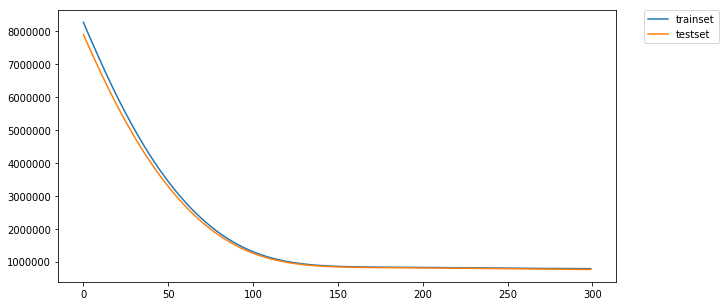

In [113]:
losses = score.history['loss']
val_losses = score.history['val_loss']
plt.figure(figsize=(10,5))
plt.plot(losses, label="trainset")
plt.plot(val_losses, label="testset")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [114]:
df_result = pd.DataFrame({'Actual' : [], 'Prediction' : []})

for i in range(len(generator_test)):
    x, y = generator_test[i]
    x_input = array(x).reshape((1, n_input, n_features))
    yhat = model.predict(x_input, verbose=2)
    df_result = df_result.append({'Actual': scaler.inverse_transform(y)[0][0], 'Prediction': scaler.inverse_transform(yhat)[0][0]}, ignore_index=True)

In [115]:
df_result['Diff'] = 100 * (df_result['Prediction'] - df_result['Actual']) / df_result['Actual']


In [116]:
pd.options.display.max_rows=1000
df_result

,Actual,Prediction,Diff
0,9606605.0,3.341187e+06,-65.219898
1,8447317.0,1.023600e+07,21.174510
2,4437805.0,8.238836e+06,85.651150
3,5722621.0,2.869006e+06,-49.865516
4,3492653.0,5.370547e+06,53.766979
5,3551725.0,3.015820e+06,-15.088570
6,5914605.0,3.401613e+06,-42.487909
7,4807005.0,6.340777e+06,31.907019
8,11327077.0,4.474839e+06,-60.494318
9,9820741.0,1.196314e+07,21.815054


In [117]:
mean = df_result['Actual'].mean()
mae = (df_result['Actual'] - df_result['Prediction']).abs().mean()

print("mean: ", mean)
print("mae:", mae)
print("mae/mean ratio: ", 100*mae/mean,"%")
print("correctness: ", 100 - 100*mae/mean,"%")

mean:  25668227.770731706
mae: 4689818.143140244
mae/mean ratio:  18.270907462056368 %
correctness:  81.72909253794363 %


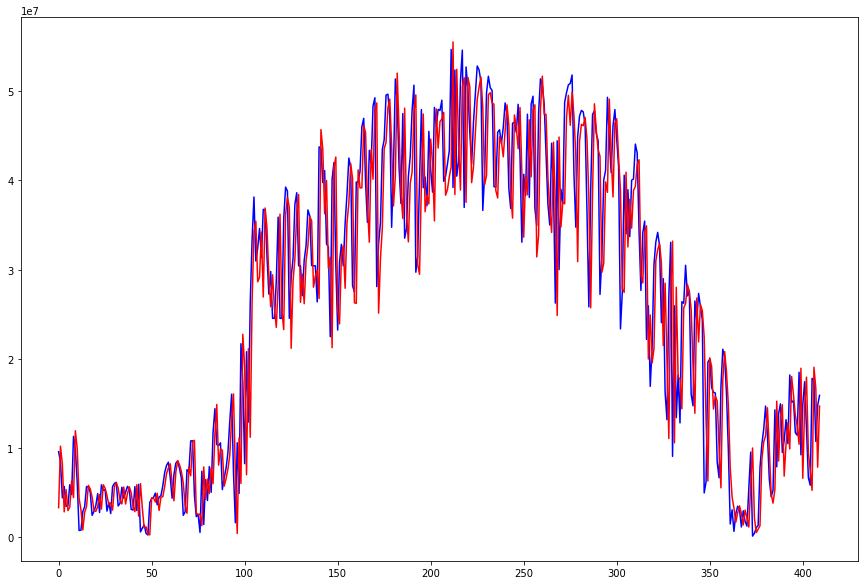

In [118]:
plt.figure(figsize=(15,10))
plt.plot(df_result['Actual'], color='blue')
plt.plot(df_result['Prediction'], color='red')
plt.show()

In [119]:
df_result = pd.DataFrame({'Actual' : [], 'Prediction' : []})

for i in range(len(generator_hold)):
    x, y = generator_hold[i]
    x_input = array(x).reshape((1, n_input, n_features))
    yhat = model.predict(x_input, verbose=2)
    df_result = df_result.append({'Actual': scaler.inverse_transform(y)[0][0], 'Prediction': scaler.inverse_transform(yhat)[0][0]}, ignore_index=True)

In [120]:
df_result['Diff'] = 100 * (df_result['Prediction'] - df_result['Actual']) / df_result['Actual']
df_result

,Actual,Prediction,Diff
0,27874621.0,12634849.0,-54.672571
1,33767053.0,29607594.0,-12.318099
2,17182589.0,33736248.0,96.339725
3,16237437.0,12252632.0,-24.540850
4,17470565.0,14839213.0,-15.061631
5,16554949.0,17321390.0,4.629679
6,23754349.0,15250111.0,-35.800762
7,25844021.0,24512648.0,-5.151571
8,29609861.0,24988846.0,-15.606338
9,28613021.0,28732636.0,0.418044


In [121]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_result)

        Actual  Prediction        Diff
0   27874621.0  12634849.0  -54.672571
1   33767053.0  29607594.0  -12.318099
2   17182589.0  33736248.0   96.339725
3   16237437.0  12252632.0  -24.540850
4   17470565.0  14839213.0  -15.061631
5   16554949.0  17321390.0    4.629679
6   23754349.0  15250111.0  -35.800762
7   25844021.0  24512648.0   -5.151571
8   29609861.0  24988846.0  -15.606338
9   28613021.0  28732636.0    0.418044
10  14996925.0  27455478.0   83.074050
11  10514837.0  12512526.0   18.998763
12  10625597.0  10634317.0    0.082066
13  18592933.0  10250104.0  -44.870968
14  21487461.0  19410178.0   -9.667420
15  10514837.0  21862826.0  107.923585
16   7620309.0   8723079.0   14.471460
17  16791237.0   7106509.0  -57.677275
18   9311245.0  17581008.0   88.814793
19  10573909.0  11037856.0    4.387658
20  20077117.0   9491272.0  -52.725922
21  14996925.0  20814644.0   38.792746
22   5264813.0  12945080.0  145.879198
23  16385117.0   3185755.5  -80.557017
24  16407269.0  18034568.

In [122]:
mean = df_result['Actual'].mean()
mae = (df_result['Actual'] - df_result['Prediction']).abs().mean()

print("mean: ", mean)
print("mae:", mae)
print("mae/mean ratio: ", 100*mae/mean,"%")
print("correctness: ", 100 - 100*mae/mean,"%")

mean:  17512469.2
mae: 5714557.1
mae/mean ratio:  32.631361315970224 %
correctness:  67.36863868402978 %


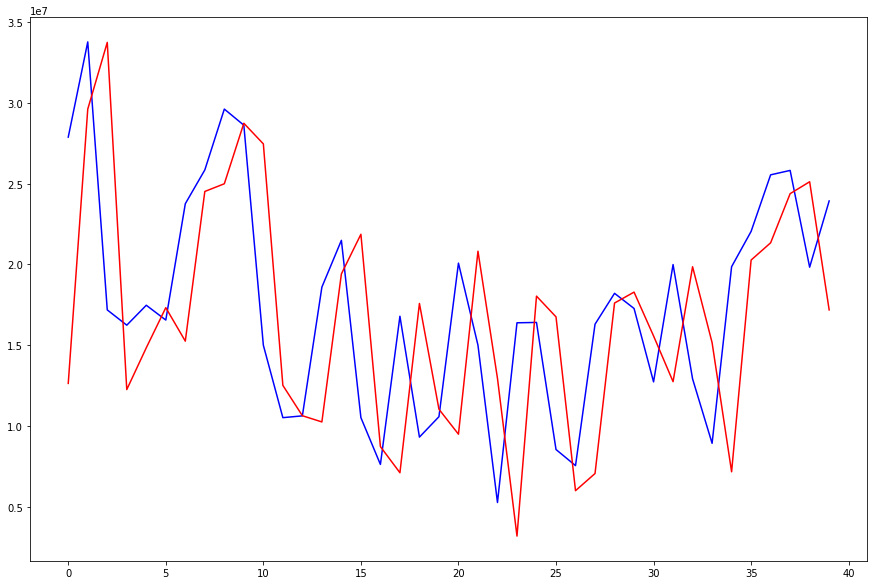

In [123]:
plt.figure(figsize=(15,10))
plt.plot(df_result['Actual'], color='blue')
plt.plot(df_result['Prediction'], color='red')
plt.show()

# ---------------------------------------------------------------------------------------------------------------

# ARIMA test - BENCHMARK

# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

# --------------------------------------------------------------------------------------------------------------- 

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6 
%matplotlib inline

In [26]:
# fix random seed for reproducibility
np.random.seed(10)
#see current working directory
cwd = os.getcwd()
#change it to the current path
os.chdir("C:/Users/Davor/")
# load the dataset
path = './Desktop/Notebooks/data.csv'
def getTansformedData(path):
    frame = pd.read_csv(path,engine='python',skiprows=0)
    return frame

In [27]:
data=getTansformedData(path)  
def num_missing(x):
    return sum(x.isnull())
data.apply(num_missing, axis=0)

Unnamed: 0              0
starttime               0
freq                    0
freqscaled              0
Year                    0
Month                   0
Day                     0
High Temp (F)           0
Low Temp (F)            0
High Dew Point (F)      0
Low Dew Point (F)       0
High Humidity (%)       0
Low Humidity (%)        0
High Visibility (mi)    0
Low Visibility (mi)     0
High Wind (mph)         0
Avg Wind (mph)          0
High Wind Gust (mph)    0
Snowfall (in)           0
Precip (in)             0
Events                  1
dtype: int64

In [28]:
del data['Unnamed: 0']
data.head()

,starttime,freq,freqscaled,Year,Month,Day,High Temp (F),Low Temp (F),High Dew Point (F),Low Dew Point (F),High Humidity (%),Low Humidity (%),High Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events
0,2016-01-01,241,0.029794,2016,1,1,41,33,27,18,70,46,10,8,23,13,32,0.0,0.0,None
1,2016-01-02,220,0.026950,2016,1,2,40,31,21,17,61,40,10,10,22,13,28,0.0,0.0,None
2,2016-01-03,245,0.030336,2016,1,3,44,31,24,20,69,43,10,10,21,12,28,0.0,0.0,None
3,2016-01-04,276,0.034534,2016,1,4,36,14,25,2,72,50,10,2,21,12,28,0.0,0.0,Snow
4,2016-01-05,325,0.041170,2016,1,5,26,8,4,-5,58,27,10,10,18,10,23,0.0,0.0,None


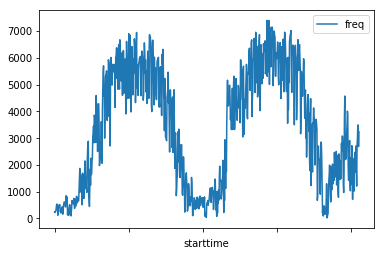

<Figure size 432x288 with 0 Axes>

In [29]:
data.plot(x='starttime',y='freq')
plt.show()
plt.savefig('C:/Users/Davor/Desktop/ARIMA_DEMO.png')

In [30]:
def Change_Dtypes(data):
    data['Date']=pd.to_datetime(data['starttime'],errors='coerce')
    return data
Change_Dtypes(data)

,starttime,freq,freqscaled,Year,Month,Day,High Temp (F),Low Temp (F),High Dew Point (F),Low Dew Point (F),...,Low Humidity (%),High Visibility (mi),Low Visibility (mi),High Wind (mph),Avg Wind (mph),High Wind Gust (mph),Snowfall (in),Precip (in),Events,Date
0,2016-01-01,241,0.029794,2016,1,1,41,33,27,18,...,46,10,8,23,13,32,0.00,0.00,None,2016-01-01
1,2016-01-02,220,0.026950,2016,1,2,40,31,21,17,...,40,10,10,22,13,28,0.00,0.00,None,2016-01-02
2,2016-01-03,245,0.030336,2016,1,3,44,31,24,20,...,43,10,10,21,12,28,0.00,0.00,None,2016-01-03
3,2016-01-04,276,0.034534,2016,1,4,36,14,25,2,...,50,10,2,21,12,28,0.00,0.00,Snow,2016-01-04
4,2016-01-05,325,0.041170,2016,1,5,26,8,4,-5,...,27,10,10,18,10,23,0.00,0.00,None,2016-01-05
5,2016-01-06,459,0.059317,2016,1,6,45,21,10,-5,...,12,10,10,15,10,22,0.00,0.00,None,2016-01-06
6,2016-01-07,533,0.069339,2016,1,7,43,26,24,6,...,22,10,10,14,6,18,0.00,0.00,None,2016-01-07
7,2016-01-08,537,0.069881,2016,1,8,42,30,34,24,...,70,10,10,18,11,23,0.00,0.00,None,2016-01-08
8,2016-01-09,327,0.041441,2016,1,9,41,38,38,32,...,76,10,2,16,6,18,0.00,0.01,Rain,2016-01-09
9,2016-01-10,121,0.013543,2016,1,10,58,38,57,37,...,83,10,0,30,15,39,0.00,1.38,Rain,2016-01-10


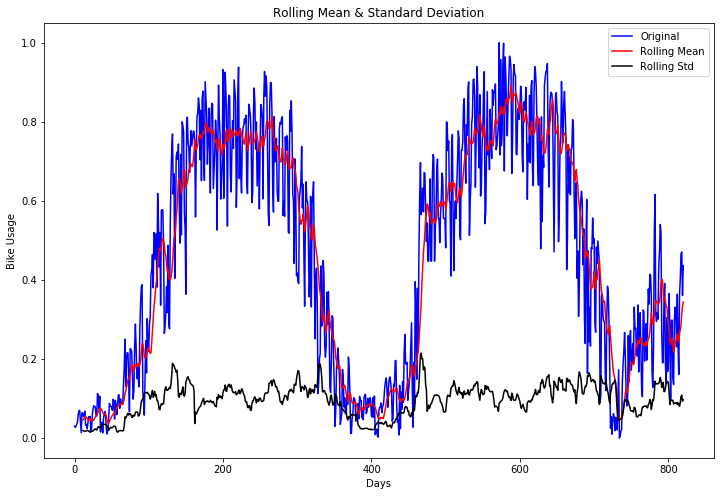

Results of Dickey-Fuller Test
Test Statistic                  -1.818492
p-value                          0.371320
#Lags Used                      20.000000
Number of Observations Used    800.000000
Critical Value (1%)             -3.438551
Critical Value (5%)             -2.865160
Critical Value (10%)            -2.568697
dtype: float64


In [31]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
#     #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(12).std()

#     #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel("Days")
    plt.ylabel("Bike Usage")
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
test_stationarity(data.freqscaled)

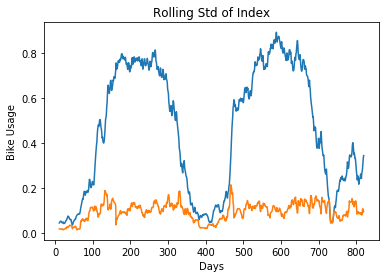

In [32]:
def Plot_rolling_stats(value):
    #test_stationarity(data.value)
    var_index = value.rolling(12).std()
    mean_index = value.rolling(12).mean()
    mean_index.plot()
    plt.title("Rolling Mean of Index")
    plt.xlabel("Days")
    plt.ylabel("Bike Usage")
    var_index.plot()
    plt.title("Rolling Std of Index")
    plt.xlabel("Days")
    plt.ylabel("Bike Usage")
Plot_rolling_stats(data.freqscaled)

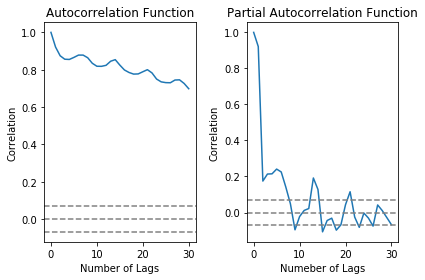

In [33]:
def Plot_ACF_PACF(value):
    lag_acf = acf(value, nlags=30)
    lag_pacf = pacf(value, nlags=30, method='ols')
    plt.subplot(121) 
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(value,)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function')
    plt.xlabel("Number of Lags")
    plt.ylabel("Correlation")
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(value)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.xlabel("Numeber of Lags")
    plt.ylabel("Correlation")
    plt.tight_layout()
Plot_ACF_PACF(data.freqscaled)

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this 

271.89968729019165


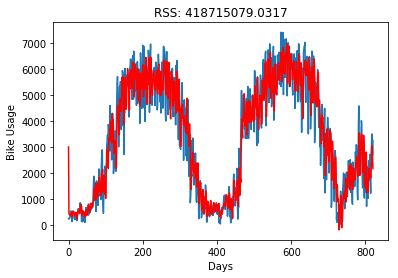

In [76]:
import time

start = time.time()

def build_ARIMA_model(value):
    model = ARIMA(np.array(value), order=(20,0,0))
    results_AR = model.fit(disp=-1)
    plt.plot(value)
    plt.plot(results_AR.fittedvalues, color='red')
    plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-value)**2))
    plt.xlabel("Days")
    plt.ylabel("Bike Usage")
    return results_AR.fittedvalues,value
pred,true=build_ARIMA_model(data.freq)

end = time.time()

print(end-start)

In [77]:
def Find_RMSE_MAE(x,x1,i):
        if i==1:
            return math.sqrt(mean_squared_error(x, x1))
        else:
            return mean_absolute_error(x, x1)
# calculate root mean squared error
trerr= Find_RMSE_MAE(true,pred,1)
print('Train Score: %.2f RMSE' %(trerr))
# calculate mean absloute error
meanerrtr = Find_RMSE_MAE(true,pred,0)
print ('Train Score: %.2f MAE' %(meanerrtr))

Train Score: 714.15 RMSE
Train Score: 536.74 MAE


In [78]:
razlika = true -pred
razlikabs = np.absolute(razlika)
razm = razlikabs.mean()

mse = razlika**2
mse = np.absolute(mse)
mse = mse.mean()

xmean = true.mean()

rmse = math.sqrt(mse)

crrct = 1 - (razm/xmean)

print(mse, "MSE")
print(rmse, "RMSE")
print(razm, "MAE")
print(crrct, "CORRECTNESS")

510006.186396651 MSE
714.1471741851612 RMSE
536.739402914334 MAE
0.8425037921659642 CORRECTNESS


# ---------------------------------------------------------------------------------------------------------------

# RNN LSTM

# --------------------------------------------------------------------------------------------------------------- 

In [74]:
data = pd.read_csv('C:/Users/Davor/Desktop/Notebooks/data.csv')

del data['Unnamed: 0']

data = data['freqscaled']    # freqscaled

data.values.astype("float32")

data = data.values.reshape(-1,1)     #THIS IS TO BE USED TO GET CORRECT RESHAPE

data[0:5]

array([[0.02979415],
       [0.02695016],
       [0.03033586],
       [0.03453413],
       [0.0411701 ]])

In [75]:
# Multilayer Perceptron to Predict Bike Frequencies (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense

start = time.time()

 
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)                                        #7
# load the dataset
dataset = data
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.606)                                                          #TRAIN SIZE 0.67
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape dataset
look_back = 2                                                                    #LOOK_BACK = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(16, input_dim=look_back, activation='tanh'))                 #12 relu
#model.add(Dense(16, input_dim=look_back, activation='tanh'))                 
#model.add(Dense(12, activation='tanh'))                                       #8 relu
model.add(Dense(12, input_dim=look_back, activation='relu'))  
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=300, batch_size=2, verbose=2)             # EPOCHS=400

# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :600] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

end = time.time()

print(end-start)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/300
 - 0s - loss: 0.0180
Epoch 2/300
 - 0s - loss: 0.0122
Epoch 3/300
 - 0s - loss: 0.0115
Epoch 4/300
 - 0s - loss: 0.0113
Epoch 5/300
 - 0s - loss: 0.0109
Epoch 6/300
 - 0s - loss: 0.0109
Epoch 7/300
 - 0s - loss: 0.0115
Epoch 8/300
 - 0s - loss: 0.0107
Epoch 9/300
 - 0s - loss: 0.0111
Epoch 10/300
 - 0s - loss: 0.0110
Epoch 11/300
 - 0s - loss: 0.0107
Epoch 12/300
 - 0s - loss: 0.0109
Epoch 13/300
 - 0s - loss: 0.0110
Epoch 14/300
 - 0s - loss: 0.0106
Epoch 15/300
 - 0s - loss: 0.0110
Epoch 16/300
 - 0s - loss: 0.0107
Epoch 17/300
 - 0s - loss: 0.0108
Epoch 18/300
 - 0s - loss: 0.0108
Epoch 19/300
 - 0s - loss: 0.0107
Epoch 20/300
 - 0s - loss: 0.0108
Epoch 21/300
 - 0s - loss: 0.0105
Epoch 22/300
 - 0s - loss: 0.0108
Epoch 23/300
 - 0s - loss: 0.0107
Epoch 24/300
 - 0s - loss: 0.0106
Epoch 25/300
 - 0s - loss: 0.0108
Epoch 26/300
 - 0s - loss: 0.0107
Epoch

Epoch 222/300
 - 0s - loss: 0.0101
Epoch 223/300
 - 0s - loss: 0.0100
Epoch 224/300
 - 0s - loss: 0.0101
Epoch 225/300
 - 0s - loss: 0.0102
Epoch 226/300
 - 0s - loss: 0.0100
Epoch 227/300
 - 0s - loss: 0.0099
Epoch 228/300
 - 0s - loss: 0.0103
Epoch 229/300
 - 0s - loss: 0.0100
Epoch 230/300
 - 0s - loss: 0.0098
Epoch 231/300
 - 0s - loss: 0.0101
Epoch 232/300
 - 0s - loss: 0.0098
Epoch 233/300
 - 0s - loss: 0.0100
Epoch 234/300
 - 0s - loss: 0.0100
Epoch 235/300
 - 0s - loss: 0.0098
Epoch 236/300
 - 0s - loss: 0.0099
Epoch 237/300
 - 0s - loss: 0.0100
Epoch 238/300
 - 0s - loss: 0.0099
Epoch 239/300
 - 0s - loss: 0.0100
Epoch 240/300
 - 0s - loss: 0.0102
Epoch 241/300
 - 0s - loss: 0.0101
Epoch 242/300
 - 0s - loss: 0.0098
Epoch 243/300
 - 0s - loss: 0.0100
Epoch 244/300
 - 0s - loss: 0.0099
Epoch 245/300
 - 0s - loss: 0.0101
Epoch 246/300
 - 0s - loss: 0.0101
Epoch 247/300
 - 0s - loss: 0.0099
Epoch 248/300
 - 0s - loss: 0.0102
Epoch 249/300
 - 0s - loss: 0.0100
Epoch 250/300
 - 0s 

In [76]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

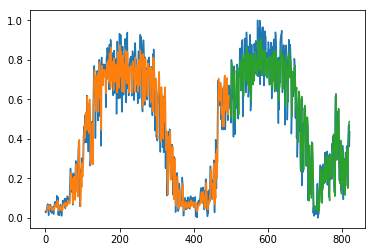

In [77]:
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [78]:
z = testX - testPredict

z = np.absolute(z)

zm = z.mean()

xm = testX.mean()

rez = 1 - (zm/xm)

rez

0.8823532909154892

In [640]:
len(testX)

214

In [641]:
len(testPredict)

214

In [642]:
len(trainX)

601

In [643]:
len(trainPredict)

601

In [644]:
mse = (7405*testX) - (7405*testPredict)
mae = mse.mean()
print(mae)
mse = mse**2
mse = mse.mean()
print(mse)
rmse = math.sqrt(mse)
print(rmse)
#rmse = math.sqrt(mean_squared_error(real, pred))
#rmse

-40.600113
343407.4
586.0097322144062


In [645]:
z = testX - testPredict

z = np.absolute(z)

z

z = z[0:]        #max index is size 418

len(z)


214

In [646]:
testXCV = testX[0:107]
len(testXCV)

107

In [647]:
zm = z.mean()

xm = testXCV.mean()

rez = 1 - (zm/xm)

rez

0.9077347666025162

In [648]:
z = testX - testPredict
z = np.absolute(z)
z = z[107:214]
testXCV = testX[107:214]
zm = z.mean()
xm = testXCV.mean()
rez = 1 - (zm/xm)
rez

0.810644268989563

In [649]:
z = testX - testPredict
z = np.absolute(z)
z = z[214:321]
testXCV = testX[214:321]
zm = z.mean()
xm = testXCV.mean()
rez = 1 - (zm/xm)
rez

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice.
  


nan

In [584]:
z = testX - testPredict
z = np.absolute(z)
z = z[321:600]
testXCV = testX[321:600]
zm = z.mean()
xm = testXCV.mean()
rez = 1 - (zm/xm)
rez

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice.
  """
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice.
  


nan

In [568]:
#z = testX - testPredict
#z = np.absolute(z)
#z = z[:130]
#testXCV = testX[:130]
#zm = z.mean()
#xm = testXCV.mean()
#rez = 1 - (zm/xm)
#rez

In [351]:
# Multilayer Perceptron to Predict Bike Frequencies (t+1, given t, t-1, t-2)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
 
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)
 
# fix random seed for reproducibility
numpy.random.seed(7)                                        #7
# load the dataset
dataset = data
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.6878)                                                          #TRAIN SIZE 0.67
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape dataset
look_back = 2                                                                    #LOOK_BACK = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(24, input_dim=look_back, activation='relu'))                 #12 relu
model.add(Dense(18, activation='tanh'))                                       #8 relu
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)             # EPOCHS=400

# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :600] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

Epoch 1/200
 - 1s - loss: 0.0315
Epoch 2/200
 - 0s - loss: 0.0120
Epoch 3/200
 - 0s - loss: 0.0119
Epoch 4/200
 - 0s - loss: 0.0116
Epoch 5/200
 - 0s - loss: 0.0117
Epoch 6/200
 - 0s - loss: 0.0114
Epoch 7/200
 - 0s - loss: 0.0116
Epoch 8/200
 - 0s - loss: 0.0116
Epoch 9/200
 - 0s - loss: 0.0115
Epoch 10/200
 - 0s - loss: 0.0114
Epoch 11/200
 - 0s - loss: 0.0114
Epoch 12/200
 - 0s - loss: 0.0117
Epoch 13/200
 - 0s - loss: 0.0114
Epoch 14/200
 - 0s - loss: 0.0115
Epoch 15/200
 - 0s - loss: 0.0113
Epoch 16/200
 - 0s - loss: 0.0111
Epoch 17/200
 - 0s - loss: 0.0117
Epoch 18/200
 - 0s - loss: 0.0110
Epoch 19/200
 - 0s - loss: 0.0111
Epoch 20/200
 - 0s - loss: 0.0111
Epoch 21/200
 - 0s - loss: 0.0114
Epoch 22/200
 - 0s - loss: 0.0109
Epoch 23/200
 - 0s - loss: 0.0113
Epoch 24/200
 - 0s - loss: 0.0115
Epoch 25/200
 - 0s - loss: 0.0115
Epoch 26/200
 - 0s - loss: 0.0114
Epoch 27/200
 - 0s - loss: 0.0111
Epoch 28/200
 - 0s - loss: 0.0109
Epoch 29/200
 - 0s - loss: 0.0112
Epoch 30/200
 - 0s - lo

In [352]:
z = testX - testPredict
z = np.absolute(z)
z = z[:100]
testXCV = testX[:100]
zm = z.mean()
xm = testXCV.mean()
rez = 1 - (zm/xm)
rez

0.8912005722522736

In [353]:
z = testX - testPredict
z = np.absolute(z)
z = z[:100]
testXCV = testX[100:200]
zm = z.mean()
xm = testXCV.mean()
rez = 1 - (zm/xm)
rez

0.7269844114780426

In [354]:
z = testX - testPredict
z = np.absolute(z)
z = z[:100]
testXCV = testX[200:]
zm = z.mean()
xm = testXCV.mean()
rez = 1 - (zm/xm)
rez

0.7101512849330902

# ---------------------------------------------------------------------------------------------------------------

# CROSS VALIDATION

# ---------------------------------------------------------------------------------------------------------------

In [151]:
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

In [152]:
datatest.head()

,freq,freqscaled,High Temp (F),Low Temp (F),High Dew Point (F),Low Dew Point (F),High Humidity (%),Low Humidity (%),High Visibility (mi),Low Visibility (mi),...,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Year_2016,Year_2017,Year_2018
0,241,0.029794,41,33,27,18,70,46,10,8,...,0,0,0,0,0,0,0,1,0,0
1,220,0.026950,40,31,21,17,61,40,10,10,...,0,0,0,0,0,0,0,1,0,0
2,245,0.030336,44,31,24,20,69,43,10,10,...,0,0,0,0,0,0,0,1,0,0
3,276,0.034534,36,14,25,2,72,50,10,2,...,0,0,0,0,0,0,0,1,0,0
4,325,0.041170,26,8,4,-5,58,27,10,10,...,0,0,0,0,0,0,0,1,0,0


In [153]:
#datatest.iloc[:, [0, 3]]
#datatest.iloc[:, 0]

In [154]:
features = datatest.iloc[:, [0, 3]]
target = datatest.iloc[:, 0]

In [155]:
scaler = MinMaxScaler(feature_range=(0, 1))
features = scaler.fit_transform(features)

In [156]:
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(features):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    features_train, features_test, target_train, target_test = features[train_index], features[test_index], target[train_index], target[test_index]
    best_svr.fit(features_train, target_train)
    scores.append(best_svr.score(features_test, target_test))

Train Index:  [ 83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262
 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280
 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298
 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316
 317 318 319 320 321 322 323 324 325 

In [157]:
print(np.mean(scores))

-10.674549870276874


In [158]:
cross_val_score(best_svr, features, output, cv=10)

array([-5.63382221e+01,  5.55125408e-02, -1.18010241e+01, -1.27809627e+00,
       -1.56027715e+01, -8.40195115e-01, -5.34841705e+00, -9.96168945e+00,
       -1.72429476e-01, -5.45816616e+00])

In [159]:
from sklearn.model_selection import cross_val_predict

cross_val_predict(best_svr, features, output, cv=10)

array([4023.50127096, 4021.3439426 , 4021.73025839, 4009.08635912,
       4006.33279641, 4016.65391783, 4021.88008765, 4025.48573654,
       4029.7023606 , 4026.41161535, 4020.3799307 , 4017.10013237,
       4016.14976142, 4016.77671623, 4021.67143923, 4024.73743084,
       4020.29061309, 4011.36543868, 4010.60080972, 4014.56313317,
       4015.90670982, 4014.63815419, 4011.48464715, 4010.55361754,
       4020.76351463, 4024.1919427 , 4027.7894768 , 4023.24226267,
       4029.31206869, 4023.85911267, 4031.4201981 , 4039.76363747,
       4036.05172523, 4030.69353587, 4043.0998679 , 4014.92357065,
       4015.96426298, 4021.04970261, 4009.49503112, 4014.59664565,
       4016.10741226, 4010.65243116, 4007.5717919 , 3999.78667971,
       3997.96560627, 4002.84691606, 4023.85501609, 4031.472716  ,
       4021.54634955, 4018.1553737 , 4029.54884154, 4037.39574756,
       4028.97773545, 4024.61172147, 4030.50708048, 4039.57811143,
       4023.63586809, 4016.66925531, 4032.77532349, 4043.53778

# Stratified k-fold cross validation

# https://www.analyticsvidhya.com/blog/2018/05/improve-model-performance-cross-validation-in-python-r/

In [ ]:
features = datatest.iloc[:, [0, 3]]
target = datatest.iloc[:, 0]

In [161]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in skf.split(features,target): 
    print("Train:", train_index, "Validation:", test_index) 
    features_train, features_test = features[train_index], features[test_index] 
    target_train, target_test = target[train_index], target[test_index]

Train: [ 45  48 162 195 212 240 260 275 282 285 287 295 341 365 367 390 395 398
 401 428 435 443 449 477 480 481 483 485 496 498 499 510 514 522 541 587
 597 606 613 638 667 676 692 696 700 704 723 728 758 764 784 786 796 798
 802 809 812] Validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  46  47  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 163 164
 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
 183 184 185 186 1

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


# time series validation

In [162]:
features = datatest.iloc[:, [0, 3]]
target = datatest.iloc[:, 0]

In [170]:
from sklearn.model_selection import TimeSeriesSplit

features = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
target = np.array([1, 2, 3, 4])
tscv = TimeSeriesSplit(n_splits=3)
for train_index, test_index in tscv.split(features):
     print("Train:", train_index, "Validation:", test_index)
     features_train, features_test = features[train_index], features[test_index]
     target_train, target_test = target[train_index], target[test_index]


Train: [0] Validation: [1]
Train: [0 1] Validation: [2]
Train: [0 1 2] Validation: [3]


# https://stats.stackexchange.com/questions/14099/using-k-fold-cross-validation-for-time-series-model-selection

# https://medium.com/datadriveninvestor/k-fold-cross-validation-6b8518070833

# https://medium.com/@eijaz/holdout-vs-cross-validation-in-machine-learning-7637112d3f8f

In [146]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('C:/Users/Davor/Desktop/Notebooks/data.csv')

del data['Unnamed: 0']

data = data['freqscaled']

data.values.astype("int")

data = data.values.reshape(-1,1)     #THIS IS TO BE USED TO GET CORRECT RESHAPE

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [149]:
X, y = data[:300], data[300:600]

# hold out testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

X

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

array([[0.02130454],
       [0.01824019],
       [0.02188822],
       [0.02641179],
       [0.03356194],
       [0.05311542],
       [0.06391361],
       [0.0644973 ],
       [0.03385379],
       [0.00379396],
       [0.05793083],
       [0.05734715],
       [0.04830001],
       [0.0542828 ],
       [0.06201664],
       [0.02407705],
       [0.0250985 ],
       [0.01546768],
       [0.02874653],
       [0.04742449],
       [0.04596527],
       [0.04815409],
       [0.00933898],
       [0.01430031],
       [0.05369911],
       [0.06902087],
       [0.07660878],
       [0.07617102],
       [0.07339851],
       [0.04990515],
       [0.04902962],
       [0.11031665],
       [0.1052094 ],
       [0.0685831 ],
       [0.10302057],
       [0.00554502],
       [0.0237852 ],
       [0.03224865],
       [0.00321027],
       [0.04056618],
       [0.05515832],
       [0.06128703],
       [0.0468408 ],
       [0.01109003],
       [0.        ],
       [0.01546768],
       [0.04158763],
       [0.083

In [150]:
best_k, best_score = -1, -1
clfs = {}

for k in [1, 15, 50]: # experiment different hyperparameter
    pipe = Pipeline([['sc', StandardScaler()], ['clf', KNeighborsClassifier(n_neighbors=k)]])
    pipe.fit(X_train, y_train)
    # K-Fold CV
    scores = cross_val_score(pipe, X_train, y_train, cv=5)
    print('[%d-NN]\nValidation accuracy: %.3f %s' % (k, scores.mean(), scores))
    if scores.mean() > best_score:
        best_k, best_score = k, scores.mean()
    clfs[k] = pipe

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\sklearn\pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


ValueError: Unknown label type: 'continuous'

In [1313]:
# 10-fold cross validation


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# split into input (X) and output (Y) variables
X = dataset[:100]  #---------> means [ROWS, SOLUMNS] -----> here just ROWS ------> [from:to]  ----> from 0 to 24*10 (24 times 10 = 240)
Y = dataset[100:200] #-----> X and Y msut be the same size!!! it os required by split function down there

#X = pd.DataFrame(X)
#Y = pd.DataFrame(Y)

#print(X)
#print(Y) 

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X, Y):
  # create model

    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Fit the model
    model.fit(X[train], Y[train], epochs=150, batch_size=10, verbose=0)
    
    # evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=0)
    
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    
    cvscores.append(scores[1] * 100)
    
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

# ---------------------------------------------------------------------------------------------------------------

# CNN

# ---------------------------------------------------------------------------------------------------------------

In [173]:
import d3fdgraph

df = pd.DataFrame(
    [{"source": "1", "target": "3", "weight":1},
     {"source": "1", "target": "5", "weight":1},
     {"source": "2", "target": "5", "weight":1},
     {"source": "3", "target": "1", "weight":1},
     {"source": "3", "target": "4", "weight":1},
     {"source": "3", "target": "6", "weight":1},
     {"source": "4", "target": "3", "weight":1},
     {"source": "5", "target": "1", "weight":1},
     {"source": "5", "target": "2", "weight":1},
     {"source": "7", "target": "3", "weight":1},
    ])

In [164]:
df = pd.DataFrame(
    [{"source": "1", "target": "3"},
     {"source": "1", "target": "5"},
     {"source": "2", "target": "5"},
     {"source": "3", "target": "1"},
     {"source": "3", "target": "4"},
     {"source": "3", "target": "6"},
     {"source": "4", "target": "3"},
     {"source": "5", "target": "1"},
     {"source": "5", "target": "2"},
     {"source": "7", "target": "3"},
    ])

In [654]:
#labels =[{'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         #{'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         #{'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         #{'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         #{'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0}]

In [655]:
labels =[{'label': 1, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 4,  '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 5,  '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 6,  '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 7, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 1, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 8, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 9, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0}]

In [656]:
#train = [{'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
 #        {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
  #       {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
   #      {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
    #     {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
     #    {'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
      #   {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
       #  {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
#         {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
 #        {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
  #       {'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
   #      {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
    #     {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
     #    {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
#         {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
 #        {'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
  #       {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
   #      {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
    #     {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
     #    {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
      #   {'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
       #  {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
#         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
 #        {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
  #       {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
   #      {'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
    #     {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
     #    {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
      #   {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
       #  {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
#         {'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
 #        {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
  #       {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
   #      {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
    #     {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
     #    {'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
      #   {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
       #  {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
#         {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
 #        {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
  #       {'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
   #      {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
    #     {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
     #    {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
      #   {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
       #  {'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
#         {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
 #        {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
  #       {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
   #      {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 1, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0}]

In [657]:
train = [{'label': 1, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 4,  '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 5,  '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 6,  '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 7, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 1, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 8, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 9, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 1, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 4,  '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 5,  '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 6,  '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 7, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 1, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 8, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 9, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 1, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 4,  '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 5,  '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 6,  '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 7, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 1, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 8, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 9, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 1, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 4,  '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 5,  '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 6,  '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 7, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 1, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 8, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 9, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 1, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 4,  '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 5,  '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 6,  '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 7, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 1, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 8, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 9, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0}]

In [658]:
train

[{'label': 1,
  '1x1': 0,
  '1x2': 0,
  '1x3': 0,
  '1x4': 0,
  '1x5': 0,
  '1x6': 0,
  '1x7': 0,
  '1x8': 0,
  '1x9': 0,
  '2x1': 0,
  '2x2': 0,
  '2x3': 0,
  '2x4': 0,
  '2x5': 1,
  '2x6': 0,
  '2x7': 0,
  '2x8': 0,
  '2x9': 0,
  '3x1': 0,
  '3x2': 0,
  '3x3': 0,
  '3x4': 1,
  '3x5': 0,
  '3x6': 0,
  '3x7': 1,
  '3x8': 0,
  '3x9': 0,
  '4x1': 0,
  '4x2': 0,
  '4x3': 1,
  '4x4': 0,
  '4x5': 0,
  '4x6': 0,
  '4x7': 0,
  '4x8': 0,
  '4x9': 0,
  '5x1': 0,
  '5x2': 1,
  '5x3': 0,
  '5x4': 0,
  '5x5': 0,
  '5x6': 0,
  '5x7': 0,
  '5x8': 0,
  '5x9': 0,
  '6x1': 0,
  '6x2': 0,
  '6x3': 0,
  '6x4': 0,
  '6x5': 0,
  '6x6': 0,
  '6x7': 0,
  '6x8': 0,
  '6x9': 0,
  '7x1': 0,
  '7x2': 0,
  '7x3': 1,
  '7x4': 0,
  '7x5': 0,
  '7x6': 0,
  '7x7': 0,
  '7x8': 0,
  '7x9': 0,
  '8x1': 0,
  '8x2': 0,
  '8x3': 0,
  '8x4': 0,
  '8x5': 0,
  '8x6': 0,
  '8x7': 0,
  '8x8': 0,
  '8x9': 0,
  '9x1': 0,
  '9x2': 0,
  '9x3': 0,
  '9x4': 0,
  '9x5': 0,
  '9x6': 0,
  '9x7': 0,
  '9x8': 0,
  '9x9': 0},
 {'label': 2,

In [659]:
labels = pd.DataFrame(labels)
labels = labels[['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9', '2x1', '2x2', '2x3', '2x4', '2x5', '2x6', '2x7', '2x8', '2x9', '3x1', '3x2', '3x3', '3x4', '3x5', '3x6', '3x7', '3x8', '3x9', '4x1', '4x2', '4x3', '4x4', '4x5', '4x6', '4x7', '4x8', '4x9', '5x1', '5x2', '5x3', '5x4', '5x5', '5x6', '5x7', '5x8', '5x9', '6x1', '6x2', '6x3', '6x4', '6x5', '6x6', '6x7', '6x8' ,'6x9', '7x1', '7x2', '7x3', '7x4', '7x5', '7x6', '7x7', '7x8', '7x9', '8x1', '8x2', '8x3', '8x4', '8x5', '8x6', '8x7', '8x8', '8x9', '9x1', '9x2', '9x3', '9x4', '9x5', '9x6', '9x7', '9x8', '9x9']]
labels

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,8x9,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5,6,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [660]:
train = pd.DataFrame(train)
train = train[['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9', '2x1', '2x2', '2x3', '2x4', '2x5', '2x6', '2x7', '2x8', '2x9', '3x1', '3x2', '3x3', '3x4', '3x5', '3x6', '3x7', '3x8', '3x9', '4x1', '4x2', '4x3', '4x4', '4x5', '4x6', '4x7', '4x8', '4x9', '5x1', '5x2', '5x3', '5x4', '5x5', '5x6', '5x7', '5x8', '5x9', '6x1', '6x2', '6x3', '6x4', '6x5', '6x6', '6x7', '6x8' ,'6x9', '7x1', '7x2', '7x3', '7x4', '7x5', '7x6', '7x7', '7x8', '7x9', '8x1', '8x2', '8x3', '8x4', '8x5', '8x6', '8x7', '8x8', '8x9', '9x1', '9x2', '9x3', '9x4', '9x5', '9x6', '9x7', '9x8', '9x9']]

In [661]:
test =  [{'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 1, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 1, '1x2': 1, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 1, '2x2': 1, '2x3': 1, '2x4': 1, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 1, '3x3': 1, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 1, '4x3': 1, '4x4': 1, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 1, '5x4': 1, '5x5': 1, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0}]

In [662]:
#truth = [{'label': 1, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
 #        {'label': 1, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
  #       {'label': 1, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
   #      {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
    #     {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
     #    {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
      #   {'label': 3, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
       #  {'label': 4, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
#         {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 1, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
 #        {'label': 5, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
  #       {'label': 5, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
   #      {'label': 4, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
    #     {'label': 5, '1x1': 1, '1x2': 1, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 1, '2x2': 1, '2x3': 1, '2x4': 1, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 1, '3x3': 1, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 1, '4x3': 1, '4x4': 1, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 1, '5x4': 1, '5x5': 1, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0}]

In [663]:
truth = [{'label': 1, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 2, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 3, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 4, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 5, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 5, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 5, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'label': 6, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 7, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 1, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 8, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 9, '1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 6, '1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'label': 10, '1x1': 1, '1x2': 1, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 1, '2x2': 1, '2x3': 1, '2x4': 1, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 1, '3x3': 1, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 1, '4x3': 1, '4x4': 1, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 1, '5x4': 1, '5x5': 1, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0}]

In [664]:
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,8x9,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
5,6,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [665]:
test = pd.DataFrame(test)
test = test[['1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9', '2x1', '2x2', '2x3', '2x4', '2x5', '2x6', '2x7', '2x8', '2x9', '3x1', '3x2', '3x3', '3x4', '3x5', '3x6', '3x7', '3x8', '3x9', '4x1', '4x2', '4x3', '4x4', '4x5', '4x6', '4x7', '4x8', '4x9', '5x1', '5x2', '5x3', '5x4', '5x5', '5x6', '5x7', '5x8', '5x9', '6x1', '6x2', '6x3', '6x4', '6x5', '6x6', '6x7', '6x8' ,'6x9', '7x1', '7x2', '7x3', '7x4', '7x5', '7x6', '7x7', '7x8', '7x9', '8x1', '8x2', '8x3', '8x4', '8x5', '8x6', '8x7', '8x8', '8x9', '9x1', '9x2', '9x3', '9x4', '9x5', '9x6', '9x7', '9x8', '9x9']]

truth = pd.DataFrame(truth)
truth = truth[['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9', '2x1', '2x2', '2x3', '2x4', '2x5', '2x6', '2x7', '2x8', '2x9', '3x1', '3x2', '3x3', '3x4', '3x5', '3x6', '3x7', '3x8', '3x9', '4x1', '4x2', '4x3', '4x4', '4x5', '4x6', '4x7', '4x8', '4x9', '5x1', '5x2', '5x3', '5x4', '5x5', '5x6', '5x7', '5x8', '5x9', '6x1', '6x2', '6x3', '6x4', '6x5', '6x6', '6x7', '6x8' ,'6x9', '7x1', '7x2', '7x3', '7x4', '7x5', '7x6', '7x7', '7x8', '7x9', '8x1', '8x2', '8x3', '8x4', '8x5', '8x6', '8x7', '8x8', '8x9', '9x1', '9x2', '9x3', '9x4', '9x5', '9x6', '9x7', '9x8', '9x9']]

In [666]:
num_training = len(train.values)
num_testing = len(test.values)

print("Amount of training data:", num_training, "pairs of images and labels.")
print("Amount of testing data:", num_testing, "images.")

Amount of training data: 45 pairs of images and labels.
Amount of testing data: 13 images.


In [447]:
# Here we are defining the x & y variables for training and testing

y_train = np.array(train.pop("label").values) # array containing correct labels | Shape -> (42000,)
x_train = np.array(train.values) # array of images for training | Shape -> (42000, 784)
x_test = np.array(test.values) # array of images for testing | Shape -> (28000, 784)

In [448]:
y_train

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8,
       9], dtype=int64)

In [449]:
x_train = x_train.reshape(num_training, 9, 9) # resulting shape => (42000, 28, 28)
x_test = x_test.reshape(num_testing, 9, 9) # resulting shape => (28000, 28, 28)

In [450]:
x_train

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]],

       [[0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0

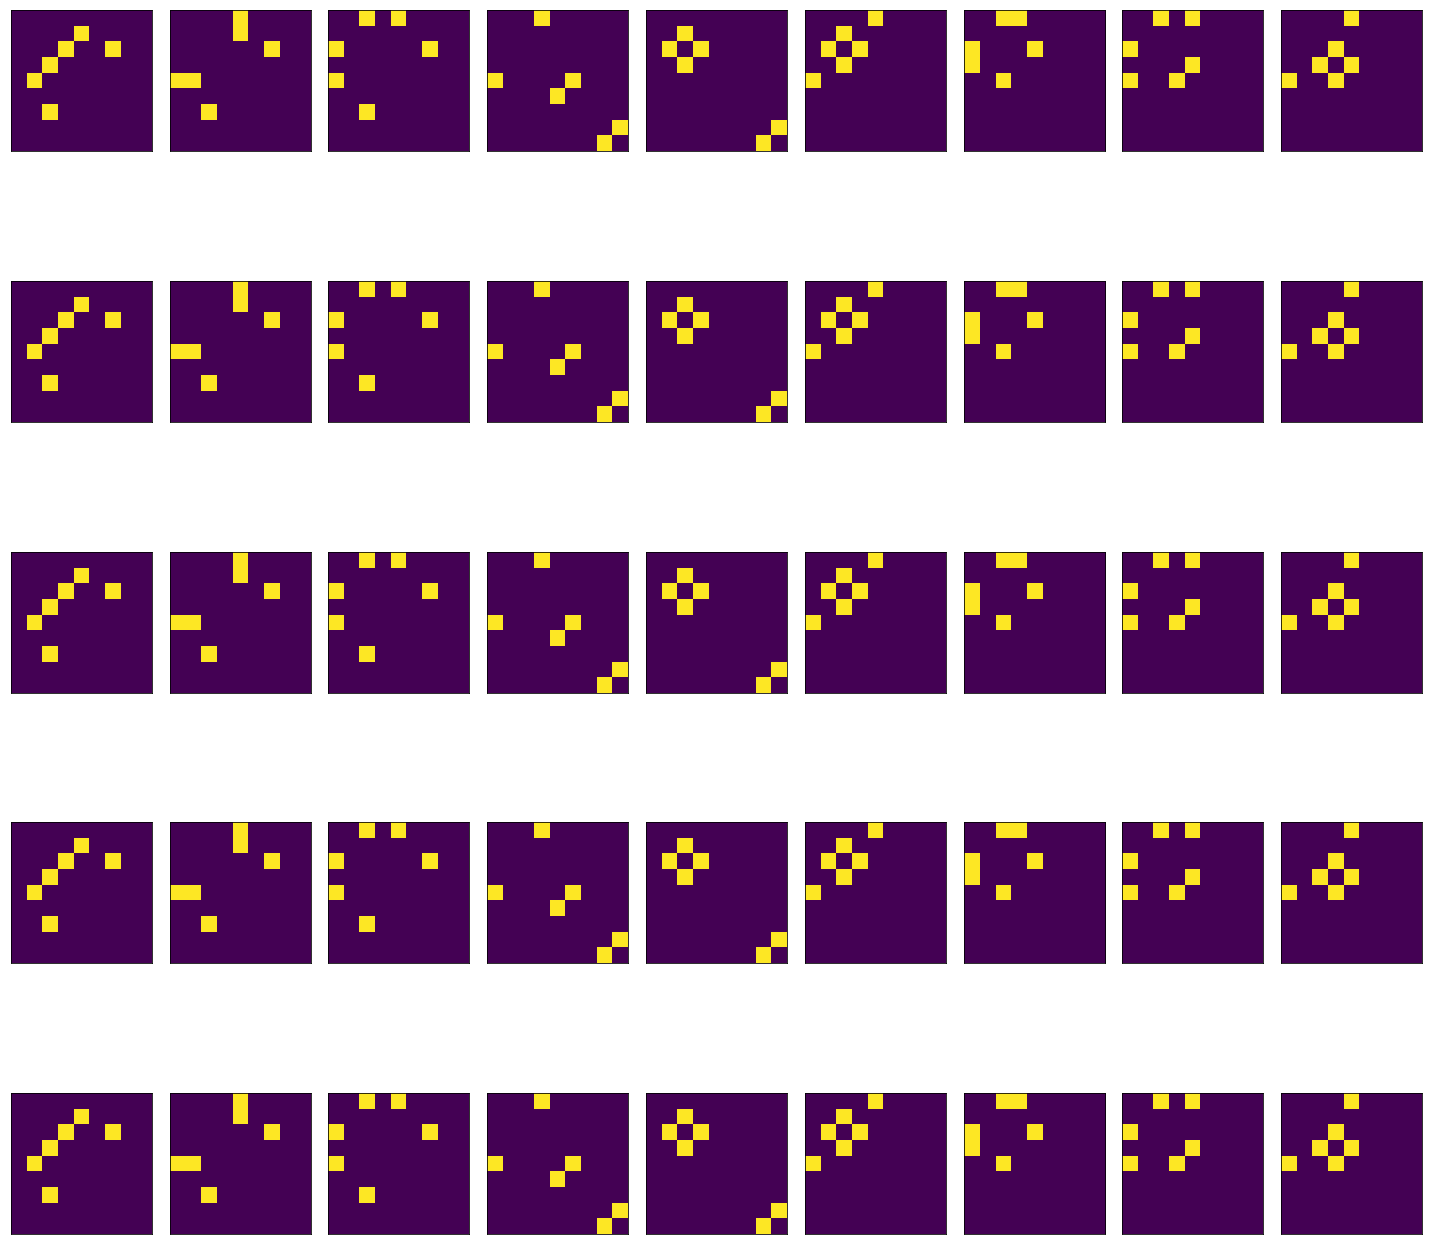

In [451]:
# Now lets take a look at some of our training images!

plt.figure(figsize=(20,20))
for i in range(45):                           # change range to be number of training images
    plt.subplot(5,9,i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

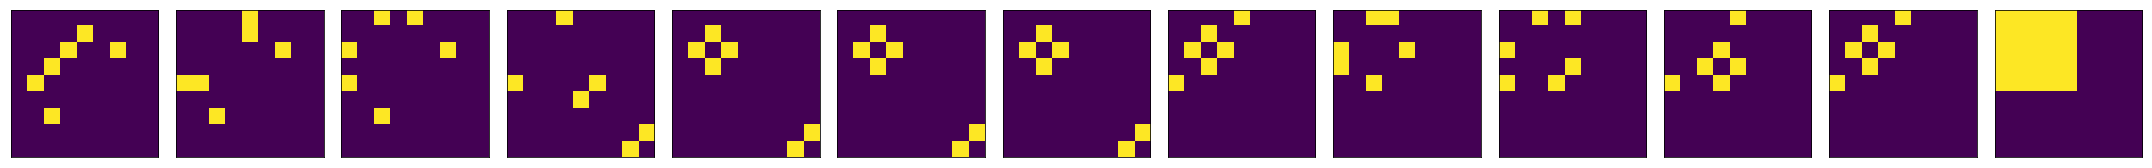

In [452]:
# Now lets take a look at some of our training images!

plt.figure(figsize=(30,15))
for i in range(13):                          # change RANGE to be number of test images
    plt.subplot(6,13,i+1)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

In [453]:
np.set_printoptions(threshold=np.inf)
train

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,3x1,3x2,3x3,3x4,3x5,3x6,3x7,3x8,3x9,4x1,4x2,4x3,4x4,4x5,4x6,4x7,4x8,4x9,5x1,5x2,5x3,5x4,5x5,5x6,5x7,5x8,5x9,6x1,6x2,6x3,6x4,6x5,6x6,6x7,6x8,6x9,7x1,7x2,7x3,7x4,7x5,7x6,7x7,7x8,7x9,8x1,8x2,8x3,8x4,8x5,8x6,8x7,8x8,8x9,9x1,9x2,9x3,9x4,9x5,9x6,9x7,9x8,9x9
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
5,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [454]:
# First of, lets standardize our features by removing the mean and scaling to unit variance
rawx = train.values[:1000] # If you don't have enough memory to run the tsne on all the data here you'll limit it
from sklearn.preprocessing import StandardScaler
xscaled = StandardScaler().fit_transform(rawx)

from sklearn.manifold import TSNE
tsne = TSNE()
vis = tsne.fit_transform(xscaled) 
vis = [{'X': vis[i][0], 'Y': vis[i][1], 'K': y_train[i]} for i in range(len(vis))] # transform to dict for plotting

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [455]:
y_train

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8,
       9], dtype=int64)

In [456]:
len(vis)

45

In [457]:
# category label name
my_labels = np.array([
    'A',
    'B',
    'C',
    'D',
    'E',
    'F'
    'G'
    'H'
    'I'])

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


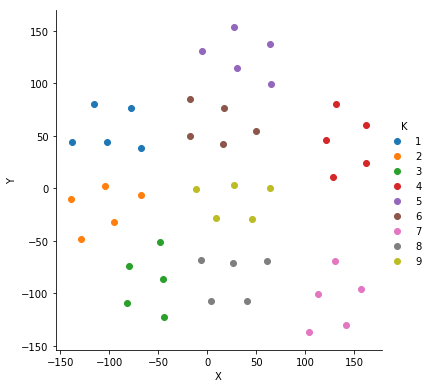

In [458]:
sns.FacetGrid(pd.DataFrame.from_dict(vis), hue="K", size=5.5) \
   .map(plt.scatter, "X", "Y") \
   .add_legend()

In [459]:
pca = PCA(n_components=9)                 #CHANGE NUMBER OF LABELS
pca_ani = pca.fit_transform(xscaled)

xpca = pca_ani[:, 0]
ypca = pca_ani[:, 1]
vispca = [{'X': xpca[i], 'Y': ypca[i], 'K': y_train[i]} for i in range(len(xpca))]

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


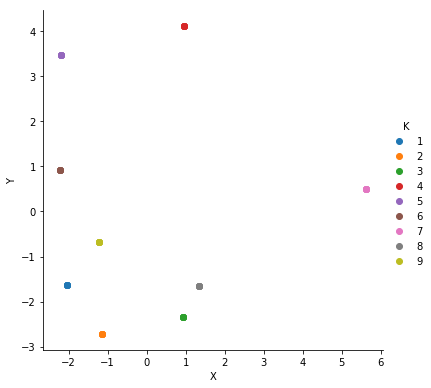

In [460]:
sns.FacetGrid(pd.DataFrame.from_dict(vispca), hue="K", size=5.5) \
   .map(plt.scatter, "X", "Y") \
   .add_legend()

In [461]:
# normalize X datapoints. We want them to be between 0 and 1
x_train = x_train # Perform an elementwise division by 255.0 (the maximum possible value for each pixel)
x_test = x_test

In [462]:
y_train_hot = LabelBinarizer().fit_transform(y_train)

In [463]:
model.compile(optimizer=Adam(lr=0.001),                            #0.001
              loss="categorical_crossentropy",
              metrics=['accuracy'],
              decay=1)

In [464]:
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(6, 5, 5, input_shape=(9, 9, 1), bias=True,
                 border_mode="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), border_mode="same"))

# Dropout Layer 1
model.add(Dropout(p=0.12))

# Convolutional Layer 2
model.add(Conv2D(16, 5, 5, bias=True,
                 border_mode="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), border_mode="same"))

# Convolutional Layer 3
model.add(Conv2D(35, 5, 5, bias=True,
                 border_mode="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), border_mode="same"))

# Flatten convolutional result so we can feed data to fully connected layers
model.add(Flatten())

# Fully connected 1
model.add(Dense(120, bias=True))
model.add(Activation('relu'))

# Dropout Layer 2
model.add(Dropout(p=0.5))

# Fully connected 1
model.add(Dense(84, bias=True))
model.add(Activation('relu'))

model.add(Dense(9, bias=True))                           #CHANGE NUMBER TO LABELS?
model.add(Activation('softmax'))

model.compile(optimizer=Adam(lr=0.001),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(9, 9, 1), padding="same", use_bias=True)`
  """
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")`
  import sys
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.12)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), padding="same", use_bias=True)`
  
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling

In [465]:
# Add extra dimension: Keras' is expecting an input of shape (num_x_train, 28, 28, 1) 
# but for the moment the shape of x_train is (num_x_train, 28, 28). We can easily add this extra 
# dimension using np.expand_dims(axis=4).
x_train = np.expand_dims(x_train, axis=4)

# We'll also take advantage of the occassion to do the same modification to x_test
x_test = np.expand_dims(x_test, axis=4)

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  after removing the cwd from sys.path.
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  import sys


In [466]:
# Now: Train the model! Remember we one-hot encoded y_train so we shold use y_train_hot as our labels.

# Note: verbose=2 gives us one log line per epoch.
training_hist = model.fit(x_train, y_train_hot, nb_epoch=60, batch_size=64, verbose=2, validation_split=0.23)    #epochs!!!!!!!!!!!

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 34 samples, validate on 11 samples
Epoch 1/60
 - 1s - loss: 2.1958 - acc: 0.1471 - val_loss: 2.1987 - val_acc: 0.0909
Epoch 2/60
 - 0s - loss: 2.1928 - acc: 0.1176 - val_loss: 2.1937 - val_acc: 0.0909
Epoch 3/60
 - 0s - loss: 2.1899 - acc: 0.1765 - val_loss: 2.1906 - val_acc: 0.0909
Epoch 4/60
 - 0s - loss: 2.1905 - acc: 0.1471 - val_loss: 2.1884 - val_acc: 0.0909
Epoch 5/60
 - 0s - loss: 2.1784 - acc: 0.1176 - val_loss: 2.1855 - val_acc: 0.0909
Epoch 6/60
 - 0s - loss: 2.1888 - acc: 0.1176 - val_loss: 2.1822 - val_acc: 0.1818
Epoch 7/60
 - 0s - loss: 2.1723 - acc: 0.1471 - val_loss: 2.1777 - val_acc: 0.2727
Epoch 8/60
 - 0s - loss: 2.1737 - acc: 0.1765 - val_loss: 2.1734 - val_acc: 0.2727
Epoch 9/60
 - 0s - loss: 2.1609 - acc: 0.2059 - val_loss: 2.1682 - val_acc: 0.2727
Epoch 10/60
 - 0s - loss: 2.1587 - acc: 0.2059 - val_loss: 2.1620 - val_acc: 0.2727
Epoch 11/60
 - 0s - loss: 2.1453 - acc: 0.2647 - val_loss: 2.1546 - val_acc: 0.2727
Epoch 12/60
 - 0s - loss: 2.1447 - acc: 0

In [467]:
hdf = pd.DataFrame.from_dict(training_hist.history)
hdf['epochs'] = list(range(60))                               # 16 is the number of epochs we used for training!!!

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


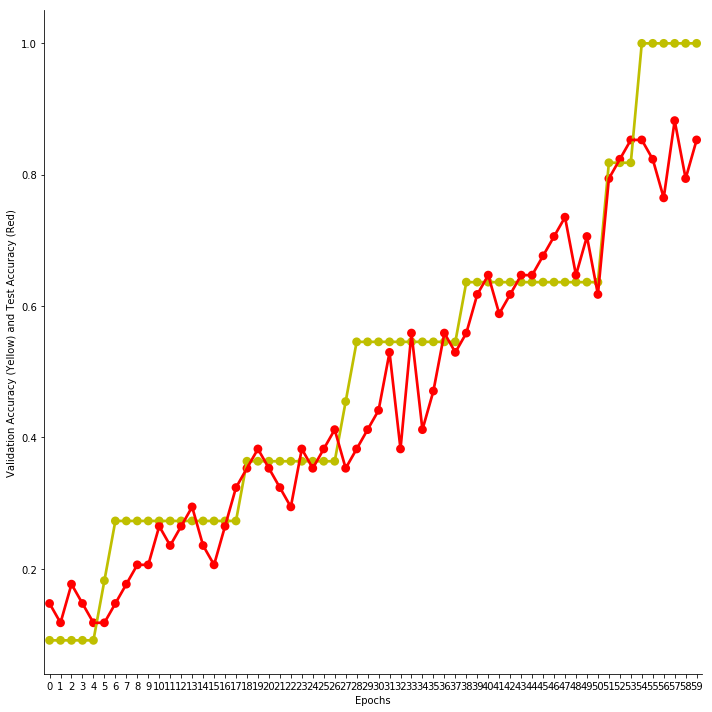

In [468]:
sns.FacetGrid(hdf, size=10) \
   .map(sns.pointplot, "epochs", "val_acc", color="y") \
   .map(sns.pointplot, "epochs", "acc", color="r") \
   .set(xlabel='Epochs', ylabel='Validation Accuracy (Yellow) and Test Accuracy (Red)')

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


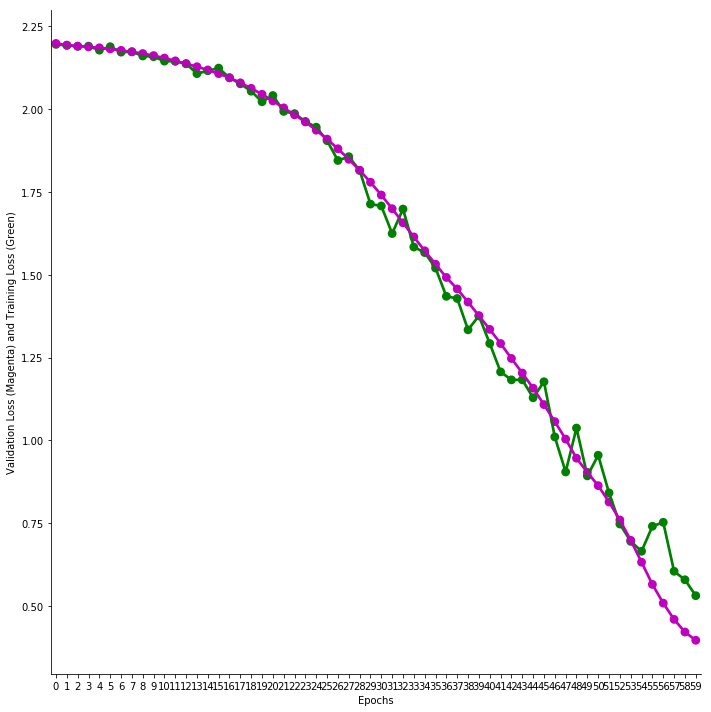

In [469]:
sns.FacetGrid(hdf, size=10) \
   .map(sns.pointplot, "epochs", "loss", color="g") \
   .map(sns.pointplot, "epochs", "val_loss", color="m") \
   .set(xlabel='Epochs', ylabel='Validation Loss (Magenta) and Training Loss (Green)') 

In [358]:
pred = model.predict_classes(x_test, verbose=4) # Shape -> (28000,)

sub_df = pd.DataFrame()
sub_df["ImageId"] = list(range(1, num_testing + 1))
sub_df["Label"] = pred+1                                      # added PLUS 1 just so that it doesn't count from ZERO

# sub_df.to_csv("mnist_predictions.csv", header=True, index=False)

In [359]:
# Display head and lenght of our predictions:
print("Amount of test points:", num_testing)
print("Amount of predictions:", len(pred))

sub_df

Amount of test points: 13
Amount of predictions: 13


,ImageId,Label
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5
5,6,5
6,7,5
7,8,6
8,9,7
9,10,9


In [360]:
len(pred)

13

In [361]:
truth.label

0      1
1      2
2      3
3      4
4      5
5      5
6      5
7      6
8      7
9      8
10     9
11     6
12    10
Name: label, dtype: int64

In [362]:
sub_df.Label

0     1
1     2
2     3
3     4
4     5
5     5
6     5
7     6
8     7
9     9
10    9
11    6
12    6
Name: Label, dtype: int64

In [363]:
same = truth['label'] == sub_df['Label']
same

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9     False
10     True
11     True
12    False
dtype: bool

In [364]:
s = sum(same)
s

11

In [365]:
precision = (s/len(pred))*100
print("precision is", precision, "%")

precision is 84.61538461538461 %


# ---------------------------------------------------------------------------------------------------------------

# CNN VERSION 2

# ---------------------------------------------------------------------------------------------------------------

In [1735]:
label1 = [[2, 5, 1], [5, 2, 1], [3, 4, 1], [4, 3, 1], [3, 7, 1], [7, 3, 1]] 
  
# Create the pandas DataFrame 
label1 = pd.DataFrame(label1, columns = ['origin', 'destination', 'weight']) 
  
label2 = [[1, 4, 1], [4, 1, 1], [2, 4, 1], [4, 2, 1], [3, 7, 1], [7, 3, 1]] 
  
# Create the pandas DataFrame 
label2 = pd.DataFrame(label2, columns = ['origin', 'destination', 'weight']) 

label3 = [[1, 3, 1], [3, 1, 1], [1, 5, 1], [5, 1, 1], [3, 7, 1], [7, 3, 1]] 
  
# Create the pandas DataFrame 
label3 = pd.DataFrame(label3, columns = ['origin', 'destination', 'weight']) 

label4 = [[1, 5, 1], [5, 1, 1], [5, 6, 1], [6, 5, 1], [8, 9, 1], [9, 8, 1]] 
  
# Create the pandas DataFrame 
label4 = pd.DataFrame(label4, columns = ['origin', 'destination', 'weight']) 

label5 = [[2, 3, 1], [3, 2, 1], [3, 4, 1], [4, 3, 1], [8, 9, 1], [9, 8, 1]] 
  
# Create the pandas DataFrame 
label5 = pd.DataFrame(label5, columns = ['origin', 'destination', 'weight']) 

label6 = [[1, 5, 1], [5, 1, 1], [2, 3, 1], [3, 2, 1], [3, 4, 1], [4, 3, 1]] 
  
# Create the pandas DataFrame 
label6 = pd.DataFrame(label6, columns = ['origin', 'destination', 'weight']) 

label7 = [[1, 3, 1], [3, 1, 1], [1, 4, 1], [4, 1, 1], [3, 5, 1], [5, 3, 1]] 
  
# Create the pandas DataFrame 
label7 = pd.DataFrame(label7, columns = ['origin', 'destination', 'weight']) 

label8 = [[1, 3, 1], [3, 1, 1], [1, 5, 1], [5, 1, 1], [4, 5, 1], [5, 4, 1]] 
  
# Create the pandas DataFrame 
label8 = pd.DataFrame(label8, columns = ['origin', 'destination', 'weight']) 

label9 = [[1, 5, 1], [5, 1, 1], [3, 4, 1], [4, 3, 1], [4, 5, 1], [5, 4, 1]] 
  
# Create the pandas DataFrame 
label9 = pd.DataFrame(label9, columns = ['origin', 'destination', 'weight']) 

label1

,origin,destination,weight
0,2,5,1
1,5,2,1
2,3,4,1
3,4,3,1
4,3,7,1
5,7,3,1


In [1736]:
from functools import partial

temp = pd.DataFrame(0, index=[1,2,3,4,5,6,7,8,9], columns=[1,2,3,4,5,6,7,8,9])
f = temp.index.get_indexer
temp.values[f(label1.origin), f(label1.destination)] = label1.weight.values

label1 = temp
label1

,1,2,3,4,5,6,7,8,9
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0


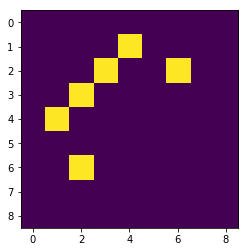

In [1737]:
plt.imshow(label1)
plt.show()

In [1738]:
temp = pd.DataFrame(0, index=[1,2,3,4,5,6,7,8,9], columns=[1,2,3,4,5,6,7,8,9])
f = temp.index.get_indexer
temp.values[f(label2.origin), f(label2.destination)] = label2.weight.values
label2 = temp

temp = pd.DataFrame(0, index=[1,2,3,4,5,6,7,8,9], columns=[1,2,3,4,5,6,7,8,9])
f = temp.index.get_indexer
temp.values[f(label3.origin), f(label3.destination)] = label3.weight.values
label3 = temp

temp = pd.DataFrame(0, index=[1,2,3,4,5,6,7,8,9], columns=[1,2,3,4,5,6,7,8,9])
f = temp.index.get_indexer
temp.values[f(label4.origin), f(label4.destination)] = label4.weight.values
label4 = temp

temp = pd.DataFrame(0, index=[1,2,3,4,5,6,7,8,9], columns=[1,2,3,4,5,6,7,8,9])
f = temp.index.get_indexer
temp.values[f(label5.origin), f(label5.destination)] = label5.weight.values
label5 = temp

temp = pd.DataFrame(0, index=[1,2,3,4,5,6,7,8,9], columns=[1,2,3,4,5,6,7,8,9])
f = temp.index.get_indexer
temp.values[f(label6.origin), f(label6.destination)] = label6.weight.values
label6 = temp

temp = pd.DataFrame(0, index=[1,2,3,4,5,6,7,8,9], columns=[1,2,3,4,5,6,7,8,9])
f = temp.index.get_indexer
temp.values[f(label7.origin), f(label7.destination)] = label7.weight.values
label7 = temp

temp = pd.DataFrame(0, index=[1,2,3,4,5,6,7,8,9], columns=[1,2,3,4,5,6,7,8,9])
f = temp.index.get_indexer
temp.values[f(label8.origin), f(label8.destination)] = label8.weight.values
label8 = temp

temp = pd.DataFrame(0, index=[1,2,3,4,5,6,7,8,9], columns=[1,2,3,4,5,6,7,8,9])
f = temp.index.get_indexer
temp.values[f(label9.origin), f(label9.destination)] = label9.weight.values
label9 = temp

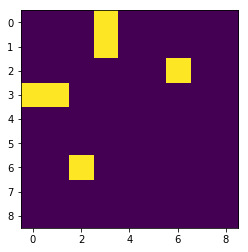

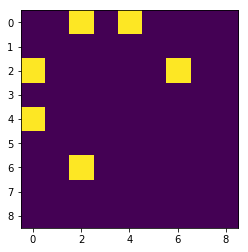

In [1739]:
plt.imshow(label2)
plt.show()

plt.imshow(label3)
plt.show()

In [1740]:
print(len(label1.values))


9


In [1741]:
train = np.concatenate((label1,label2,label3,label4,label5,label6, label7,label8,label9,label1,label2,label3,label4,label5,label6, label7,label8,label9,label1,label2,label3,label4,label5,label6, label7,label8,label9,label1,label2,label3,label4,label5,label6, label7,label8,label9,label1,label2,label3,label4,label5,label6, label7,label8,label9))

In [1742]:
train = pd.DataFrame(train)

In [1743]:
#testxyz =  [label1,label2,label3]

In [1744]:
print(len(train))

405


In [1745]:
x_train = np.array(train.values) # array of images for training | Shape -> (42000, 784)


In [1746]:
x_train = x_train.reshape(45, 9, 9) # resulting shape => (42000, 28, 28)


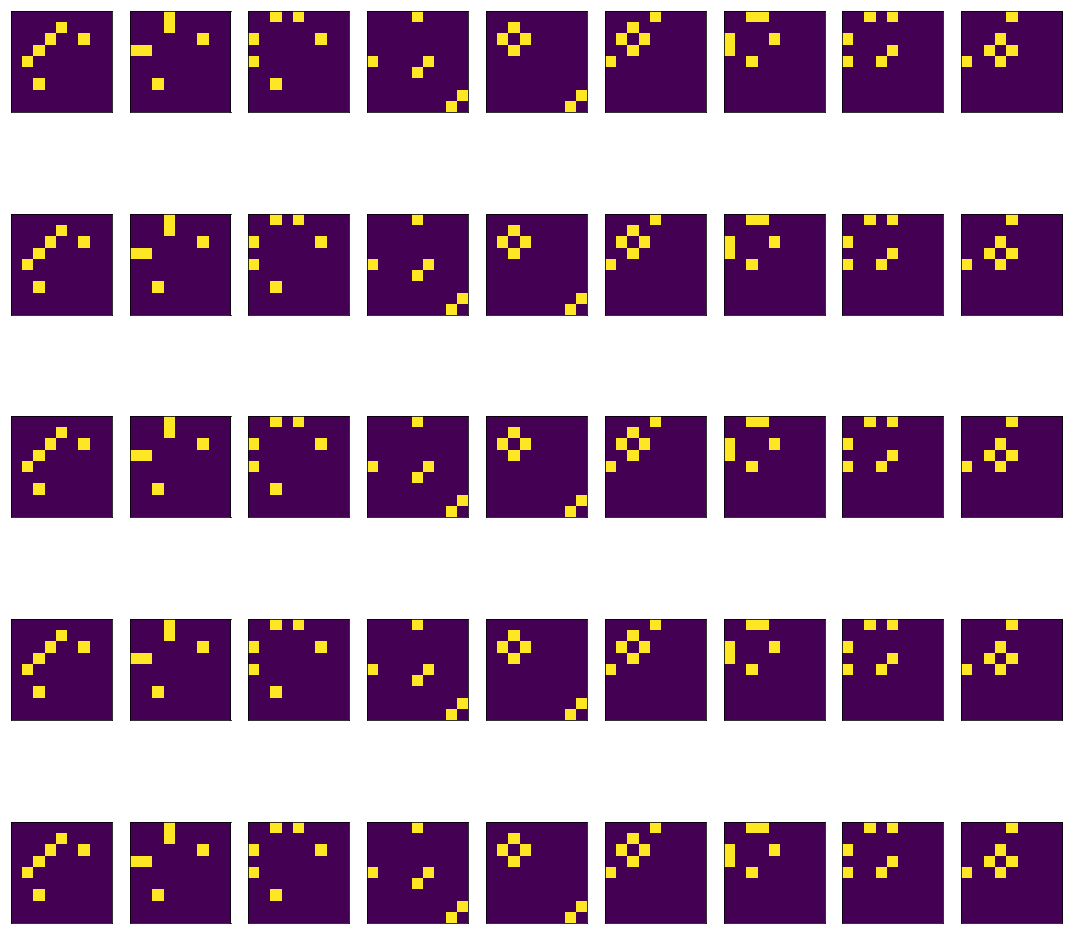

In [1747]:
# Now lets take a look at some of our training images!

plt.figure(figsize=(15,15))                     # this number are juts the site of each rectangle
for i in range(45):                           # change range to be number of training images
    plt.subplot(5,9,i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

# ---------------------------------------------------------------------------------------------------------------

In [1748]:
shape1 = [[1, 2, 1], [2, 1, 1], [1, 3, 1], [3, 1, 1], [1, 4, 1], [4, 1, 1], [1, 5, 1], [5, 1, 1], [2, 3, 1], [3, 2, 1], [2, 4, 1], [4, 2, 1], [2, 5, 1], [5, 2, 1], [3, 4, 1], [4, 3, 1], [4, 5, 1], [5, 4, 1], [3, 5, 1], [5, 3, 1]]
  
# Create the pandas DataFrame 
shape1 = pd.DataFrame(shape1, columns = ['origin', 'destination', 'weight']) 
  
shape2 = [[1, 2, 1], [2, 1, 1], [8, 9, 1], [9, 8, 1]] 
  
# Create the pandas DataFrame 
shape2 = pd.DataFrame(shape2, columns = ['origin', 'destination', 'weight']) 

shape1

,origin,destination,weight
0,1,2,1
1,2,1,1
2,1,3,1
3,3,1,1
4,1,4,1
5,4,1,1
6,1,5,1
7,5,1,1
8,2,3,1
9,3,2,1


In [1749]:
from functools import partial


temp = pd.DataFrame(0, index=[1,2,3,4,5,6,7,8,9], columns=[1,2,3,4,5,6,7,8,9])
f = temp.index.get_indexer
temp.values[f(shape1.origin), f(shape1.destination)] = shape1.weight.values
shape1 = temp

temp = pd.DataFrame(0, index=[1,2,3,4,5,6,7,8,9], columns=[1,2,3,4,5,6,7,8,9])
f = temp.index.get_indexer
temp.values[f(shape2.origin), f(shape2.destination)] = shape2.weight.values
shape2 = temp


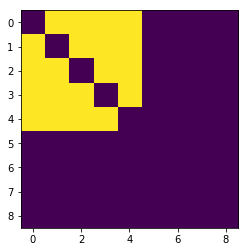

In [1750]:
plt.imshow(shape1)
plt.show()

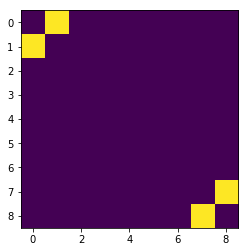

In [1751]:
plt.imshow(shape2)
plt.show()

In [1752]:
test = np.concatenate((label1,label2,label3,label4,label5,label6,label7,label8,label9,shape1,shape2))

In [1753]:
test = pd.DataFrame(test)

In [1754]:
print(len(test))

99


In [1755]:
x_test = np.array(test.values) # array of images for testing | Shape -> (42000, 784)


In [1756]:
x_test = x_test.reshape(11, 9, 9) # resulting shape => (42000, 28, 28)   #FIRST NUMBER IS NUMBER OF IMAGES!!!


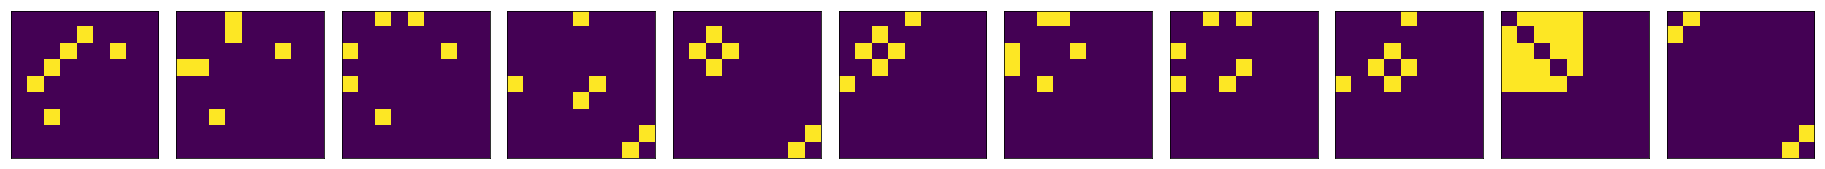

In [1757]:
# Now lets take a look at some of our training images!

plt.figure(figsize=(30,15))
for i in range(11):                          # change RANGE to be number of test images
    plt.subplot(6,13,i+1)
    plt.imshow(x_test[i])
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

In [1758]:
y_train = ([0,1,2,3,4,5,6,7,8])

In [1759]:
y_train = np.array(y_train)

In [1760]:
y_train

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [1761]:
y_train = y_train.astype('int64') 
y_train

array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [1762]:
# First of, lets standardize our features by removing the mean and scaling to unit variance
rawx = train.values#[:1000] If you don't have enough memory to run the tsne on all the data here you'll limit it
from sklearn.preprocessing import StandardScaler
xscaled = StandardScaler().fit_transform(rawx)

from sklearn.manifold import TSNE
tsne = TSNE()
vis = tsne.fit_transform(xscaled) 
vis = [{'X': vis[i][0], 'Y': vis[i][1], 'K': y_train[i]} for i in range(9)] # RANGE the number of how many train pics you have
#vis = [{'X': vis[i][0], 'Y': vis[i][1], 'K': y_train[i]} for i in range(len(vis))] # transform to dict for plotting

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [1763]:
# category label name
my_labels = np.array([
    '1',
    '2',
    '3',
    '4',
    '5',
    '6'
    '7'
    '8'
    '9'])

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


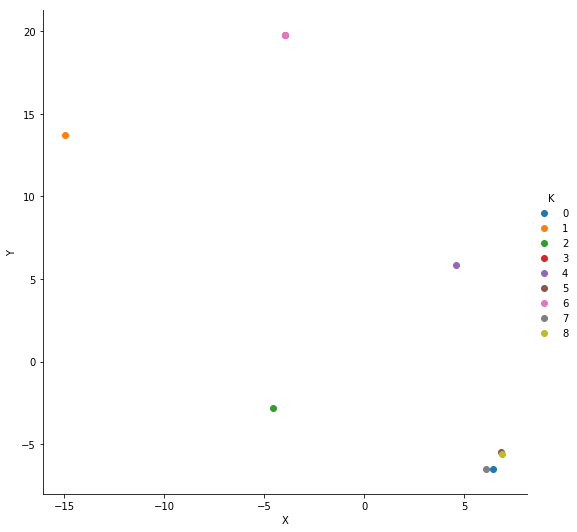

In [1764]:
sns.FacetGrid(pd.DataFrame.from_dict(vis), hue="K", size=7.5) \
   .map(plt.scatter, "X", "Y") \
   .add_legend()

In [1765]:
pca = PCA(n_components=9)                 #CHANGE NUMBER OF LABELS
pca_ani = pca.fit_transform(xscaled)

xpca = pca_ani[:, 0]
ypca = pca_ani[:, 1]
vispca = [{'X': xpca[i], 'Y': ypca[i], 'K': y_train[i]} for i in range(9)]   # SAME THING HERE

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


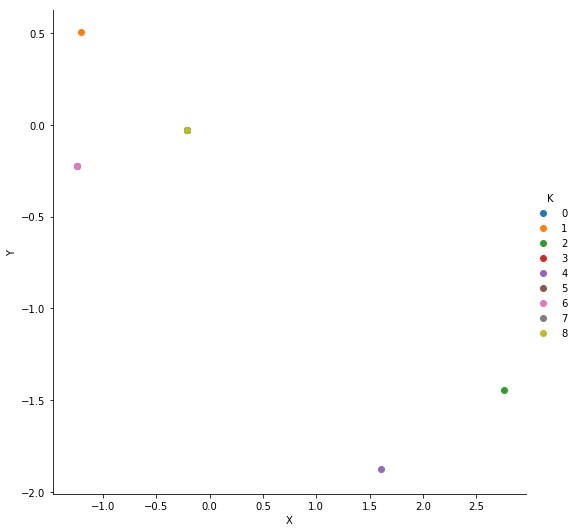

In [1766]:
sns.FacetGrid(pd.DataFrame.from_dict(vispca), hue="K", size=7.5) \
   .map(plt.scatter, "X", "Y") \
   .add_legend()

In [1767]:
y_train_hot = LabelBinarizer().fit_transform(y_train)

In [1768]:
model.compile(optimizer=Adam(lr=0.001),                            #0.001
              loss="categorical_crossentropy",
              metrics=['accuracy'],
              decay=1)

In [1770]:
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(6, 5, 5, input_shape=(9, 9, 1), bias=True,                     
                 border_mode="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), border_mode="same"))

# Dropout Layer 1
model.add(Dropout(p=0.12))

# Convolutional Layer 2
model.add(Conv2D(16, 5, 5, bias=True,
                 border_mode="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), border_mode="same"))

# Convolutional Layer 3
model.add(Conv2D(35, 5, 5, bias=True,
                 border_mode="same"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2), border_mode="same"))

# Flatten convolutional result so we can feed data to fully connected layers
model.add(Flatten())

# Fully connected 1
model.add(Dense(120, bias=True))
model.add(Activation('relu'))

# Dropout Layer 2
model.add(Dropout(p=0.5))

# Fully connected 1
model.add(Dense(84, bias=True))
model.add(Activation('relu'))

model.add(Dense(9, bias=True))                          #CHANGE THIS NUMBER TO LABELS?
model.add(Activation('softmax'))

model.compile(optimizer=Adam(lr=0.001),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(6, (5, 5), input_shape=(9, 9, 1), padding="same", use_bias=True)`
  """
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")`
  import sys
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.12)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), padding="same", use_bias=True)`
  
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling

In [1771]:
# Add extra dimension: Keras' is expecting an input of shape (num_x_train, 28, 28, 1) 
# but for the moment the shape of x_train is (num_x_train, 28, 28). We can easily add this extra 
# dimension using np.expand_dims(axis=4).
x_train = np.expand_dims(x_train, axis=4)

# We'll also take advantage of the occassion to do the same modification to x_test
x_test = np.expand_dims(x_test, axis=4)

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  after removing the cwd from sys.path.
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  import sys


In [1772]:
# Now: Train the model! Remember we one-hot encoded y_train so we shold use y_train_hot as our labels.

# Note: verbose=2 gives us one log line per epoch.
training_hist = model.fit(x_train, y_train_hot, nb_epoch=60, batch_size=64, verbose=4, validation_split=0.23)    #epochs!!!!!!!!!!!

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


ValueError: Input arrays should have the same number of samples as target arrays. Found 45 input samples and 9 target samples.

In [1773]:
hdf = pd.DataFrame.from_dict(training_hist.history)
hdf['epochs'] = list(range(60))                               # 16 is the number of epochs we used for training!!!

ValueError: Length of values does not match length of index

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


KeyError: "['epochs'] not in index"

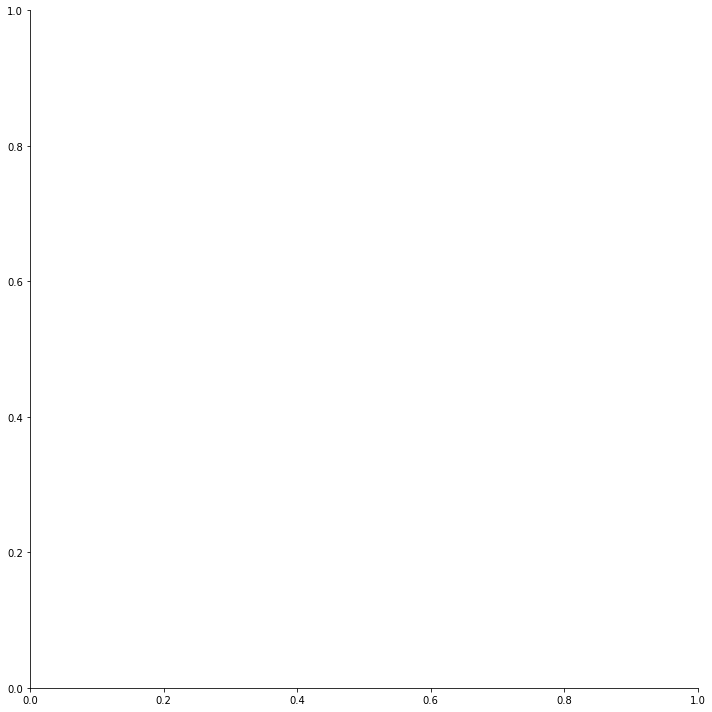

In [1774]:
sns.FacetGrid(hdf, size=10) \
   .map(sns.pointplot, "epochs", "val_acc", color="y") \
   .map(sns.pointplot, "epochs", "acc", color="r") \
   .set(xlabel='Epochs', ylabel='Validation Accuracy (Yellow) and Test Accuracy (Red)')

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


KeyError: "['epochs'] not in index"

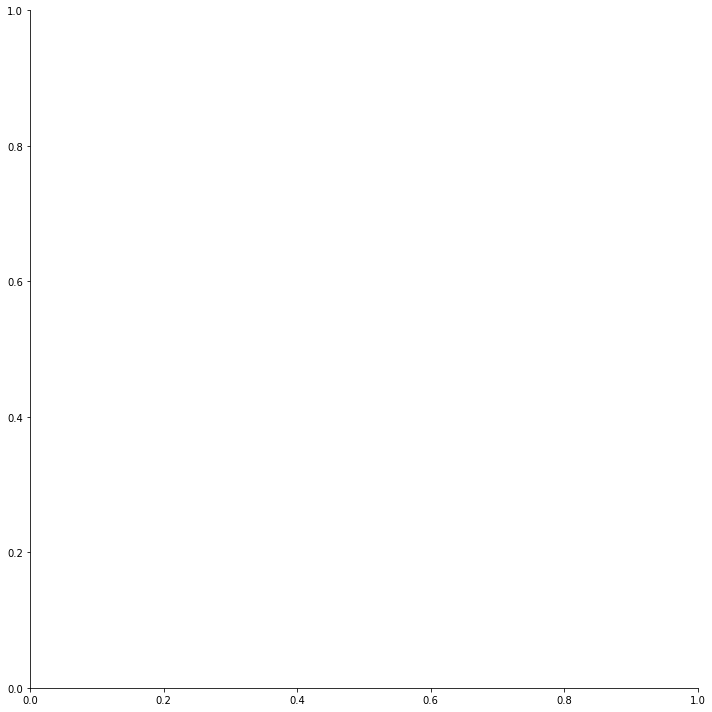

In [1775]:
sns.FacetGrid(hdf, size=10) \
   .map(sns.pointplot, "epochs", "loss", color="g") \
   .map(sns.pointplot, "epochs", "val_loss", color="m") \
   .set(xlabel='Epochs', ylabel='Validation Loss (Magenta) and Training Loss (Green)') 

In [ ]:
pred = model.predict_classes(x_test, verbose=4) # Shape -> (28000,)
pred
#sub_df = pd.DataFrame()
#sub_df["ImageId"] = list(range(1, num_testing + 1))
#sub_df["Label"] = pred+1   # added PLUS 1 just so that it doesn't count from ZERO
#sub_df
# sub_df.to_csv("mnist_predictions.csv", header=True, index=False)

# ---------------------------------------------------------------------------------------------------------------

# LeNet

# ---------------------------------------------------------------------------------------------------------------

In [527]:
# Imports
from __future__ import print_function
import numpy as np
from IPython.display import Image
import keras
from matplotlib import pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.models import Sequential
from keras.layers.core import Activation
from IPython.display import clear_output

In [528]:
X_train=[{'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 1, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
        {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 1, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
        {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 1, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
        {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 1, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
        {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 1, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0}]

In [529]:
X_train = pd.DataFrame(X_train)

In [530]:
y_train=[{'label': 1},
         {'label': 2}, 
         {'label': 3},
         {'label': 4},
         {'label': 5},
         {'label': 6},
         {'label': 7}, 
         {'label': 8}, 
         {'label': 9},
         {'label': 1},
         {'label': 2}, 
         {'label': 3},
         {'label': 4},
         {'label': 5},
         {'label': 6},
         {'label': 7}, 
         {'label': 8}, 
         {'label': 9},
         {'label': 1},
         {'label': 2}, 
         {'label': 3},
         {'label': 4},
         {'label': 5},
         {'label': 6},
         {'label': 7}, 
         {'label': 8}, 
         {'label': 9},
         {'label': 1},
         {'label': 2}, 
         {'label': 3},
         {'label': 4},
         {'label': 5},
         {'label': 6},
         {'label': 7}, 
         {'label': 8}, 
         {'label': 9},
         {'label': 1},
         {'label': 2}, 
         {'label': 3},
         {'label': 4},
         {'label': 5},
         {'label': 6},
         {'label': 7}, 
         {'label': 8}, 
         {'label': 9}, 
         ]

In [531]:
y_train = pd.DataFrame(y_train)

In [532]:
X_test = [{'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 1, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 1, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 1, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 1, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 1, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 1, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 1, '1x5': 0, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 0, '5x2': 0, '5x3': 1, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 1, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 0, '3x3': 0, '3x4': 0, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 0, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 0, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 0, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 1, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 0, '1x2': 0, '1x3': 0, '1x4': 0, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 0, '2x2': 0, '2x3': 1, '2x4': 0, '2x5': 0, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 0, '3x2': 1, '3x3': 0, '3x4': 1, '3x5': 0, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 0, '4x2': 0, '4x3': 1, '4x4': 0, '4x5': 0, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 0, '5x3': 0, '5x4': 0, '5x5': 0, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0},
         {'1x1': 1, '1x2': 1, '1x3': 1, '1x4': 1, '1x5': 1, '1x6': 0, '1x7': 0, '1x8': 0, '1x9': 0, '2x1': 1, '2x2': 1, '2x3': 1, '2x4': 1, '2x5': 1, '2x6': 0, '2x7': 0, '2x8': 0, '2x9': 0, '3x1': 1, '3x2': 1, '3x3': 1, '3x4': 1, '3x5': 1, '3x6': 0, '3x7': 0, '3x8': 0, '3x9': 0, '4x1': 1, '4x2': 1, '4x3': 1, '4x4': 1, '4x5': 1, '4x6': 0, '4x7': 0, '4x8': 0, '4x9': 0, '5x1': 1, '5x2': 1, '5x3': 1, '5x4': 1, '5x5': 1, '5x6': 0, '5x7': 0, '5x8': 0, '5x9': 0, '6x1': 0, '6x2': 0, '6x3': 0, '6x4': 0, '6x5': 0, '6x6': 0, '6x7': 0, '6x8': 0,'6x9': 0, '7x1': 0, '7x2': 0, '7x3': 0, '7x4': 0, '7x5': 0, '7x6': 0, '7x7': 0, '7x8': 0, '7x9': 0, '8x1': 0, '8x2': 0, '8x3': 0, '8x4': 0, '8x5': 0, '8x6': 0, '8x7': 0, '8x8': 0, '8x9': 0, '9x1': 0, '9x2': 0, '9x3': 0, '9x4': 0, '9x5': 0, '9x6': 0, '9x7': 0,'9x8': 0, '9x9': 0}]

In [533]:
X_test = pd.DataFrame(X_test)

In [534]:
y_test =[{'label': 1},
         {'label': 2}, 
         {'label': 3},
         {'label': 4},
         {'label': 5},
         {'label': 5},
         {'label': 5}, 
         {'label': 6},
         {'label': 7},
         {'label': 8},
         {'label': 9}, 
         {'label': 6}, 
         {'label': 7}]

In [535]:
y_test = pd.DataFrame(y_test)

In [536]:
print("Shape of training data", X_train.shape)
print("Shape of labels", y_train.shape)

Shape of training data (45, 81)
Shape of labels (45, 1)


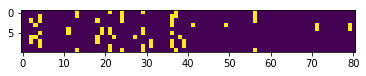

In [537]:
plt.imshow(X_train.iloc[0:10])
plt.show()

In [538]:
# Convert y into categorical f
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
y_test[1:10,:]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [539]:
# Data reshape for keras format
#X_train = X_train.reshape(-1, 9, 9, 1)
#X_test = X_test.reshape(-1, 9, 9, 1)

In [540]:
# Model Definition -- ReLu has been used, that was not in original implementation
# INPUT => CONV => RELU => POOL => CONV => RELU => POOL => FC => RELU => FC
model = Sequential()
model.add(Conv2D(6, kernel_size=2, strides=1, padding='same', input_shape=(9, 9, 1)))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Activation("relu"))
model.add(Conv2D(16, kernel_size=2, strides=1, padding='valid'))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=2, strides=2))
model.add(Flatten())
model.add(Dense(120))
model.add(Activation("relu"))
model.add(Dense(84))
model.add(Dense(10, activation='softmax'))

In [541]:

# Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 9, 9, 6)           30        
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 4, 4, 6)           0         
_________________________________________________________________
activation_63 (Activation)   (None, 4, 4, 6)           0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 3, 3, 16)          400       
_________________________________________________________________
activation_64 (Activation)   (None, 3, 3, 16)          0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 16)                0         
__________

In [542]:
# Plot Loss in real time -- Ref [stared]

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [515]:
# Train Model with sgd
model.compile('sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=64, epochs=25, validation_data=[X_test, y_test], callbacks=[plot_losses])

ValueError: Error when checking input: expected conv2d_50_input to have 4 dimensions, but got array with shape (45, 81)

In [546]:
# Train Model with adam -- Adam works much better (please note the scale on y-axis are differentlenet.save('myletnet.h5'))
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=[X_test, y_test], callbacks=[plot_losses])

ValueError: Error when checking input: expected conv2d_53_input to have 4 dimensions, but got array with shape (45, 81)

# ---------------------------------------------------------------------------------------------------------------

# GENERATING MATRICES

# ---------------------------------------------------------------------------------------------------------------

In [1374]:
df = [[2, 5, 1], [5, 2, 1], [3, 4, 1], [4, 3, 1], [3, 7, 1], [7, 3, 1]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(df, columns = ['origin', 'destination', 'weight']) 
  
# print dataframe. 
df 

,origin,destination,weight
0,2,5,1
1,5,2,1
2,3,4,1
3,4,3,1
4,3,7,1
5,7,3,1


In [1375]:
df1 = [[1, 5, 1], [5, 1, 1], [2, 5, 1], [5, 2, 1], [3, 7, 1], [7, 3, 1]] 
  
# Create the pandas DataFrame 
df1 = pd.DataFrame(df1, columns = ['origin', 'destination', 'weight']) 

df1

,origin,destination,weight
0,1,5,1
1,5,1,1
2,2,5,1
3,5,2,1
4,3,7,1
5,7,3,1


In [1376]:
from functools import partial

df2 = pd.DataFrame(0, index=[1,2,3,4,5,6,7,8,9], columns=[1,2,3,4,5,6,7,8,9])
f = df2.index.get_indexer
df2.values[f(df.origin), f(df.destination)] = df.weight.values

print(df2)

   1  2  3  4  5  6  7  8  9
1  0  0  0  0  0  0  0  0  0
2  0  0  0  0  1  0  0  0  0
3  0  0  0  1  0  0  1  0  0
4  0  0  1  0  0  0  0  0  0
5  0  1  0  0  0  0  0  0  0
6  0  0  0  0  0  0  0  0  0
7  0  0  1  0  0  0  0  0  0
8  0  0  0  0  0  0  0  0  0
9  0  0  0  0  0  0  0  0  0


In [1377]:
print("Shape of training data", df2.shape)

Shape of training data (9, 9)


In [1177]:
df22 = pd.DataFrame(0, index=[1,2,3,4,5,6,7,8,9], columns=[1,2,3,4,5,6,7,8,9])
f = df22.index.get_indexer
df22.values[f(df1.origin), f(df1.destination)] = df1.weight.values

In [1178]:
df22.shape

(9, 9)

In [1179]:
#df3 = df2.as_matrix()
#df3

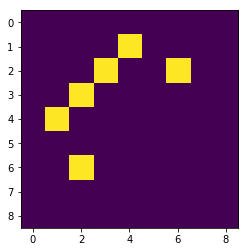

In [1180]:
plt.imshow(df2.iloc[0:10])
plt.show()

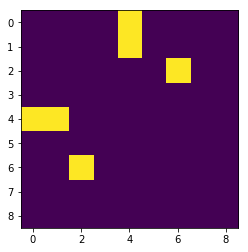

In [1181]:
plt.imshow(df22.iloc[0:10])
plt.show()

In [1182]:
df2 = df2.as_matrix()
df2

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [1183]:
df22 = df22.as_matrix()
df22

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [1184]:
# Imports
from __future__ import print_function
import numpy as np
from IPython.display import Image
import keras
from matplotlib import pyplot as plt
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.models import Sequential
from keras.layers.core import Activation
from IPython.display import clear_output

In [1185]:
X_train = [df2, df22]

In [1186]:
X_train

[array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64),
 array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)]

In [1187]:
pan = pd.Panel(X_train)
pan = pan.swapaxes(1, 0).to_frame()
#pan.index = pan.index.droplevel('minor')
#df.index.name = 'Date'
#df.index = df.index+1
#df.columns = list('ABC')

pan

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2961: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  


0  1  2  3  4  5  6  7  8
major minor                           
0     0      0  0  0  0  0  0  0  0  0
      1      0  0  0  0  1  0  0  0  0
      2      0  0  0  1  0  0  1  0  0
      3      0  0  1  0  0  0  0  0  0
      4      0  1  0  0  0  0  0  0  0
      5      0  0  0  0  0  0  0  0  0
      6      0  0  1  0  0  0  0  0  0
      7      0  0  0  0  0  0  0  0  0
      8      0  0  0  0  0  0  0  0  0
1     0      0  0  0  0  1  0  0  0  0
      1      0  0  0  0  1  0  0  0  0
      2      0  0  0  0  0  0  1  0  0
      3      0  0  0  0  0  0  0  0  0
      4      1  1  0  0  0  0  0  0  0
      5      0  0  0  0  0  0  0  0  0
      6      0  0  1  0  0  0  0  0  0
      7      0  0  0  0  0  0  0  0  0
      8      0  0  0  0  0  0  0  0  0

In [1188]:
pan2 = pan.as_matrix()
pan2

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [1189]:
X_test = pan2
X_train = X_test

In [1190]:
y_train = [[1, 2]] 
  

y_train = pd.DataFrame(y_train)

y_train

,0,1
0,1,2


In [1191]:
y_train = y_train.as_matrix()
y_train

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1, 2]], dtype=int64)

In [1192]:
y_test = y_train

In [1193]:
y_test

array([[1, 2]], dtype=int64)

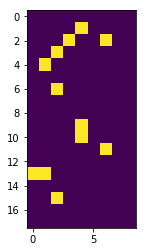

In [1194]:
plt.imshow(pan.iloc[0:18])
plt.show()

In [1195]:
#y_train = [{1,2}]

In [1196]:
X_test = X_train

In [1197]:
#y_test = [{1,2}]

In [1198]:
print("Shape of training data", X_train.shape)

Shape of training data (18, 9)


In [1199]:
X_train.reshape(-1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [1200]:
X_test.reshape(-1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [1201]:
print("Shape of test data", X_test.shape)

Shape of test data (18, 9)


In [1202]:
y_test.shape

(1, 2)

In [1203]:
y_train.shape

(1, 2)

In [1204]:
X_train.shape

(18, 9)

In [1207]:
X_train.reshape(18, 9, -1)

array([[[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0]],

       [[0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [

In [1208]:
X_test.reshape(18,9,-1)

array([[[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0]],

       [[0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        [

In [1209]:
X_train.shape

(18, 9)

In [1124]:
X_train = np.expand_dims(X_train, axis=4)

# We'll also take advantage of the occassion to do the same modification to x_test
X_test = np.expand_dims(X_test, axis=4)

C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """Entry point for launching an IPython kernel.
C:\Users\Davor\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  after removing the cwd from sys.path.


In [1125]:
# Model Definition -- ReLu has been used, that was not in original implementation
# INPUT => CONV => RELU => POOL => CONV => RELU => POOL => FC => RELU => FC
model = Sequential()
model.add(Conv2D(6, kernel_size=1, strides=1, padding='same', input_shape=(9, 1, 1)))
model.add(MaxPool2D(pool_size=1, strides=2))
model.add(Activation("relu"))
model.add(Conv2D(16, kernel_size=1, strides=1, padding='valid'))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=1, strides=2))
model.add(Flatten())
model.add(Dense(120))
model.add(Activation("relu"))
model.add(Dense(84))
model.add(Dense(10, activation='softmax'))

In [1126]:

# Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_91 (Conv2D)           (None, 9, 1, 6)           12        
_________________________________________________________________
max_pooling2d_89 (MaxPooling (None, 5, 1, 6)           0         
_________________________________________________________________
activation_128 (Activation)  (None, 5, 1, 6)           0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 5, 1, 16)          112       
_________________________________________________________________
activation_129 (Activation)  (None, 5, 1, 16)          0         
_________________________________________________________________
max_pooling2d_90 (MaxPooling (None, 3, 1, 16)          0         
_________________________________________________________________
flatten_43 (Flatten)         (None, 48)                0         
__________

In [1127]:
# Plot Loss in real time -- Ref [stared]

class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

In [1128]:
# Train Model with sgd
model.compile('sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=64, epochs=25, validation_data=[X_test, y_test], callbacks=[plot_losses])

ValueError: Error when checking input: expected conv2d_91_input to have 4 dimensions, but got array with shape (18, 9, 1)